# 🔭 **Taller de Gráficos en <span style="color:#306998">Py</span><span style="color:#FFD43B">thon</span> (2025)** 📊
## _Consejería académica de Astronomía 2025_
### Créditos:
- Elaboración notebook: Diego Beltrán
- Partes del material se basan en el material de talleres anteriores, como el notebook de la consejería académica 2021, 2023 y 2024.

---
#### Objetivos y aprendizajes esperados 🤠
En este taller se busca que aprendan a crear gráficos utilizando la librería [*Matplotlib*](https://matplotlib.org)
de Python, junto a otras librerías tales como
[*Numpy*](https://numpy.org), [*Astropy*](https://www.astropy.org) o [*Scipy*](https://scipy.org), de modo que se puedan enfrentar a aquellos ramos de la carrera que involucren la creación y análisis de gráficos
(también útil para los laboratorios científicos). Está pensado principalmente para estudiantes de segundo y tercer semestre que ya aprobaron
el ramo "Introducción a la Programación", en especial a aquellos que esten cursando el curso "Introducción al Análisis de Datos".

El taller les enseñará de forma básica estos conceptos, por lo que si requieren aprender algo que no esté en el notebook les sugerimos leer
las documentaciones de las librerías, buscar en [Stackoverflow](https://stackoverflow.com/questions) o preguntar a sus ayudantes. 

---
### Contenidos:
1. [**🗃️ Listas, *arrays*, y tablas**](#seccion-1)
2. [**📃 Escribir y leer archivos `.csv`**](#seccion-2)
3. [**📊 Crear gráficos**](#seccion-3)\
    3.1 [*Plots* (*figure*)](#seccion-3.1)\
    3.2 [*Sub-plots*](#seccion-3.2)
4. [**✒️ Partes de un gráfico y cómo editarlas**](#seccion-4)
5. [**👑 Gráficos más utilizados**](#seccion-5)\
    5.1 [Gráfico de línea `plot()`](#seccion-5.1)\
    5.2 [Gráfico de puntos `scatter()` y `errorbar()`](#seccion-5.2)\
    5.3 [Histograma `hist()`](#seccion-5.3)\
    5.4 [Gráfico de contorno `contourf()` y `contour()`](#seccion-5.4)\
    5.5 [Gráfico de barra `bar()`](#seccion-5.5)
6. [**🛠️ Herramientas para estudiar gráficos**](#seccion-6)\
    6.1 [Ajuste de curvas](#seccion-6.1)\
    6.2 [Estimación de la densidad de Kernel (KDE)](#seccion-6.2)
7. [**🎀 Estética de un gráfico**](#seccion-7)\
    7.1 [Parámetros](#seccion-7.1)\
    7.2 [🖼️ Ejemplo 1](#seccion-7.2)\
    7.3 [🖼️ Ejemplo 2](#seccion-7.3)\
    7.4 [🖼️ Ejemplo 3](#seccion-7.4)\
    7.5 [🖼️ Ejemplo 4](#seccion-7.5)\
    7.6 [🌐 Cambiar parámetros globales](#seccion-7.6)\
    7.7 [💾 Guardar gráficas como imágenes](#seccion-7.7)
---

In [1]:
# Save plots
import os
def save_func(path='images',fig_name='img',img_dpi=300):
    if not os.path.exists(path): os.makedirs(path)
    plt.savefig(os.path.join('images',f'{fig_name}.png'),bbox_inches='tight',pad_inches=0.3,dpi=img_dpi)

```
,facecolor='w'
save_func(fig_name='5.5_barras')
```

## ¿Cómo instalo las librerías?
Es tán rápido y sencillo como abrir su terminal CMD y ejecutar la siguiente línea:

> `pip install matplotlib numpy astropy scipy`

Y si usan Anaconda/Miniconda:

> `conda install matplotlib numpy astropy scipy`


## Imports
Siempre que se comienza a trabajar es necesario importar las librerías que se utilizarán. 
Importaremos `numpy` y le llamaremos `np` para simplificar el código. De `matplotlib` importaremos el 
módulo `pyplot` como `plt`, y de `astropy` importaremos `Table` del módulo `table`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

---
## 1. 🗃️ Listas, *arrays*, y tablas <a name="seccion-1"></a>

Como vieron en el curso de Intro a la progra, Python ofrece listas para manejar colecciones de datos.
Sin embargo, existen otras estructuras más potentes, como los arrays de *Numpy*.

Aunque son similares a las listas, los arrays son más versátiles porque permiten operaciones matemáticas y estadísticas entre listas,
son compatibles con otras librerías (como las que usaremos más adelante) y, además, son más eficientes en términos de rendimiento 👨🏻‍💻.

A continuación crearemos dos colecciones dos listas, usando tanto listas de Python como arrays de *Numpy*.

> Para crear un array, simplemente usamos la función `array()`

In [223]:
# Creamos dos listas de python
lista_python_1 = [1,2,3,4,5]
lista_python_2 = [1,1,1,1,1]

# Creamos dos arrays de numpy
array_np_1 = np.array([1,2,3,4,5])
array_np_2 = np.array([1,1,1,1,1])

¿Y si queremos **sumar** los elementos de una lista con otra?

A continuación vemos que si sumamos dos listas de python, estas se **concatenan**:

In [224]:
lista_python_1 + lista_python_2

[1, 2, 3, 4, 5, 1, 1, 1, 1, 1]

Por otro lado, si sumamos dos arrays vemos que estos efectivamente **suman** sus elementos "_uno a uno_".

In [225]:
array_np_1 + array_np_2

array([2, 3, 4, 5, 6])

Ahora, como han de esperar, también podemos **multiplicar**, **exponenciar**, o aplicar **cualquier operación matemática** a un array,
lo que hará que cada uno de sus elementos se vea afectado por esa operación.

In [226]:
# Multiplicamos el array por 3
3*array_np_1

array([ 3,  6,  9, 12, 15])

In [227]:
# Elevamos el array a 2
array_np_1**2

array([ 1,  4,  9, 16, 25])

In [228]:
# Sacamos el logaritmo natural al array
np.log(array_np_1)

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

Otra forma útil de _almacenar_ colecciones de datos son las tablas de _Astropy_. Las tablas funcionan con filas y columnas,
las cuales se comportan muy similar a los arrays, la ventaja es que ahora podemos coleccionar mayor cantidad de datos y de manera ordenada.

A continuación crearemos una tabla usando los dos arrays que definimos arriba.
Por default _Astropy_ asigna los nombres `col0, col1, col2, ...` a las columnas de nuestra tabla (más adelante veremos cómo
nombrar las columnas nosotros mismos).

> Para crear una tabla, usamos `Table()` (lo importamos al principio)

In [229]:
tabla_astropy = Table([ [1,2,3,4,5] , [1,1,1,1,1] ]) # Se entrega una lista con las columnas que queremos: [col0, col1, col2, ...]
tabla_astropy

col0,col1
int32,int32
1,1
2,1
3,1
4,1
5,1


También podemos realizar operaciones como con los arrays de _Numpy_. Para acceder a las columnas podemos utilizar `.columns[i]`,
donde `i` es el índice de la columna en la tabla.

In [230]:
tabla_astropy.columns[0] + tabla_astropy.columns[1]

2
3
4
5
6


### ❗  <span style="color:#c21d1d">**Sitios de interés para esta sección**</span> 👀:
1. [**Listas** de *Python*](https://www.w3schools.com/python/python_lists.asp)
2. [**Arrays** de *Numpy*](https://numpy.org/doc/stable/reference/generated/numpy.array.html)
3. [**Tablas** de *Astropy*](https://docs.astropy.org/en/stable/table/)

---
## 2. 📃 Escribir y leer archivos `.csv` <a name="seccion-2"></a>

Cuando se trabaja con datos muchas veces se tienen archivos con la extensión `.csv` o `.txt`.
Otras veces nosotros necesitamos crear este tipo de archivos para guardar nuestros datos.

A continuación veremos cómo podemos **escribir/guardar** y **leer** datos usando archivos.

### **Primero vamos a escribir un archivo ✍️, ¡pero sin datos no hay archivo!**

Crearemos 4 listas, donde cada una se obtiene evaluando funciones a nuestra elección.
Consideremos las siguientes funciones:
* $x^2$
* $12x + 4$
* $sin(\frac{\pi x}{8}) + 1$
* $e^x$

Primero crearemos distintos valores de $x$ para evaluar nuestras funciones. Podríamos hacerlo con listas de *Python*:

In [231]:
eje_x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

*Numpy* nos ofrece una forma más fácil de crear este tipo de listas. Usaremos `linspace(i,f,n)`: esta función genera un array de largo `n`,
con números (floats) entre `i` y `f` equidistantes, es decir, todos los números están a la misma distancia entre sí.

In [232]:
eje_x = np.linspace(0,15,16) # 16 números entre 0 y 15
eje_x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

`linspace()` es súper útil cuando queremos crear arrays de muchos números en un intervalo específico, sin tener que poner cada uno a mano 💀.

Otra ventaja de haber escrito nuestro `eje_x` como array es que podremos escribir fácilmente los fatos del `eje_y`, ya que como recuerdan,
los arrays permiten cualquier tipo de operación matemática. A continuación defenirimos cada uno de nuestros ejes Y usando las cuatro funciones de arriba:

In [233]:
# Escribimos los valores correspondientes a la función y = x^2
eje_y_1 = eje_x**2

# Escribimos los valores correspondientes a la función y = 12x + 4
eje_y_2 = 12*eje_x + 4

# Escribimos los valores correspondientes a la función y = sin(πx/8) + 1
eje_y_3 = np.sin(np.pi*eje_x/8) + 1

# Escribimos los valores correspondientes a la función y = e^x
eje_y_4 = np.exp(eje_x)

Ahora juntaremos todos nuestros datos en una tabla de *Astropy*. Para darle nombres a nuestras columnas podemos usar el atributo `names`:

In [234]:
tabla_funciones = Table([eje_x,eje_y_1,eje_y_2,eje_y_3,eje_y_4], names=['x','y1','y2','y3','y4'])
tabla_funciones

x,y1,y2,y3,y4
float64,float64,float64,float64,float64
0.0,0.0,4.0,1.0,1.0
1.0,1.0,16.0,1.3826834323650898,2.718281828459045
2.0,4.0,28.0,1.7071067811865475,7.38905609893065
3.0,9.0,40.0,1.9238795325112867,20.085536923187668
4.0,16.0,52.0,2.0,54.598150033144236
5.0,25.0,64.0,1.9238795325112867,148.4131591025766
6.0,36.0,76.0,1.7071067811865475,403.4287934927351
7.0,49.0,88.0,1.3826834323650898,1096.6331584284585
8.0,64.0,100.0,1.0000000000000002,2980.9579870417283


Ya con nuestra tabla creada, podemos utilizar la función `write(path)` para escribir un archivo con los datos de la tabla.
Esta función recibe la ruta del archivo o `path`, si nuestro archivo está en el mismo directorio o carpeta simplemente debemos escrirbir
el nombre del archivo y su extensión, de lo contrario podemos señalar las rutas como ``directorio_1\directorio_2\ ...\nombre_archivo.extension``.

> **Nota:** En *Windows* las rutas separan los directorios con un *backslash* " \ ",
si no sabes qué separador tiene el sistema operativo en el que trabajas puedes utilizar `os.path.join()` de la libreria `os`.
Aquí un [enlace](https://www.geeksforgeeks.org/python-os-path-join-method/) por si quieres saber cómo utilizarlo.
 <span style="color:#c21d1d">**(Fuertemente recomendado usar esto siempre que trabajemos con paths)**</span>

**Escribiendo un `.csv` (lo más común)**

Uno de los atributos importantes de `write()` es `overwrite`, cuando es `True` sobreescribirá el archivo que estemos
intentendo crear si es que ya existe.

In [235]:
tabla_funciones.write('funciones.csv', overwrite=True)

**Escribiendo un `.txt`**

Cuando se escribe un archivo `.txt` debemos indicar el formato de los caracteres que contienen nuestros datos, para eso
usamos el atributo `format`. El atributo `delimeter` es opcional, e indica qué caractér se utilizará para separar las columnas.

In [236]:
tabla_funciones.write('funciones.txt', format='ascii', delimiter=';', overwrite=True)

### **Ahora vamos a leer un archivo 📖**

Ahora que escribimos nuestro archivo `.csv`, aprendamos a abrirlo. Para esto utilizamos `read(path)`. Similar a la función
para escribir, `path` es la ruta del archivo que queremos leer en nuestro computador.

In [237]:
datos = Table.read('funciones.csv') # Leemos el archivo en la ruta "funciones.csv"
datos

x,y1,y2,y3,y4
float64,float64,float64,float64,float64
0.0,0.0,4.0,1.0,1.0
1.0,1.0,16.0,1.3826834323650898,2.718281828459045
2.0,4.0,28.0,1.7071067811865475,7.38905609893065
3.0,9.0,40.0,1.9238795325112867,20.085536923187668
4.0,16.0,52.0,2.0,54.598150033144236
5.0,25.0,64.0,1.9238795325112867,148.4131591025766
6.0,36.0,76.0,1.7071067811865475,403.4287934927351
7.0,49.0,88.0,1.3826834323650898,1096.6331584284585
8.0,64.0,100.0,1.0000000000000002,2980.9579870417283


**A continuación veremos otras formas de acceder a los datos de la tabla que podrían resultar útiles.**

👉 Acceder a una **columna** de la tabla usando el nombre de la columna

In [238]:
datos['x']

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


👉 Acceder a una columna de la tabla usando el índice de la columna

In [239]:
datos.columns[1]

0.0
1.0
4.0
9.0
16.0
25.0
36.0
49.0
64.0
81.0
100.0


👉 Acceder a una **fila** de la tabla

In [240]:
datos[3] # Fila con índice 3 (cuarta fila)

x,y1,y2,y3,y4
float64,float64,float64,float64,float64
3.0,9.0,40.0,1.9238795325112867,20.085536923187668


👉 Acceder a un **elemento** específico de la tabla, usando las columnas y filas para localizarlo

In [241]:
datos['y2'][3] # Columna llamada "y2", fila con índice 3

40.0

### ❗  <span style="color:#c21d1d">**Sitios de interés para esta sección**</span> 👀:
1. [Lectura y escritura de tablas de *Astropy*](https://docs.astropy.org/en/stable/table/io.html)
2. [Módulo `path` de la librería *OS*](https://www-geeksforgeeks-org.translate.goog/os-path-module-python/?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc)

---
## 3. 📊 Crear gráficos <a name="seccion-3"></a>

Utilizaremos los datos del archivo `funciones.csv` creado anteriormente. Lo volveremos a leer en caso de que lo necesitemos:

In [3]:
datos = Table.read('funciones.csv')

### 3.1 *Plots* (*figure*) <a name="seccion-3.1"></a>

El primer paso para crear un gráfico es crear la **figura**, es decir, lo que contendrá nuestros plots.
Hay dos formas de crear una figura, a continuación se muestra una que sólo permite crear **un** gráfico dentro de la figura.
Para esto utilizamos la función `figure()`, a la cual le indicamos el tamaño con el atributo `figsize = (ancho,alto)`. 

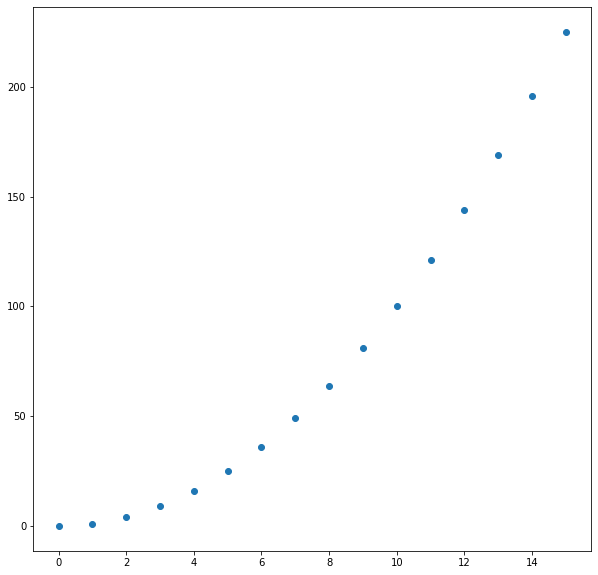

In [243]:
plt.figure(figsize = (10,10)) # Figura de tamaño 10 x 10 (pulgadas)
plt.scatter(datos['x'],datos['y1']) # Gráfico de dispersión con eje_x y eje_y_1
plt.show() # Muestra la figura

Hay otra forma de crear una figura que sí nos permite tener **más de un gráfico** dentro de la figura,
a esto se le llama _sub-plots_ y es lo que veremos en la sección [3.2](#seccion-3.2).
Para esto, en vez de usar `figure()` usaremos `subplots(filas,columnas)`.

La versión para 1 solo gráfico (1 fila y 1 columna) se ve así:

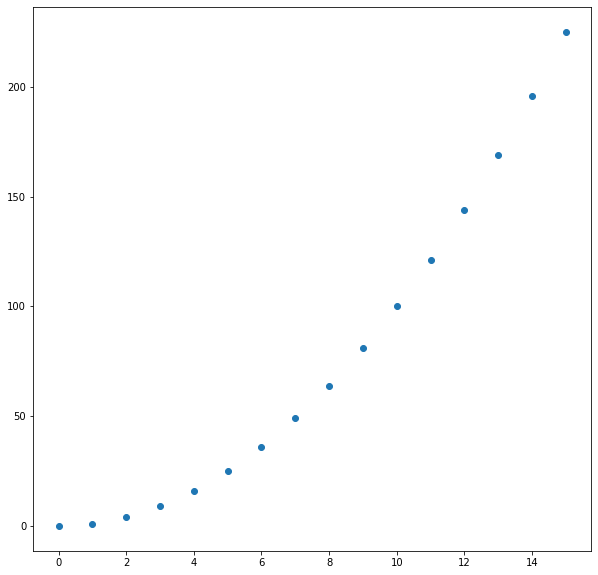

In [244]:
fig, ax = plt.subplots(1,1,figsize = (10,10)) # Crea solo 1 subplot llamado "ax"
ax.scatter(datos['x'],datos['y1'])
plt.show()

### 3.2 *Sub-plots* <a name="seccion-3.2"></a>

Como vimos antes, para crear más de un gráfico dentro de una figura tenemos que usar la función `subplots(filas,columnas)`.
Si queremos incluir nuestros cuatro gráficos, podriamos por ejemplo hacer una figura con 2 filas y 2 columnas.

Esto se puede entender como una matriz de *f $\times$ c* tal que `subplots(f,c)`.
La forma en que podemos referirnos a cada _sub-plot_ o `ax`creado es con los índices de la matriz $f \times c$.
Por ejemplo el gráfico en la primera fila (índice 0) y segunda columna (índice 1) se escribiría `ax[0][1]`.

A continuación haremos una figura con 4 _sub-plots_, uno para cada función de nuestra tabla de funciones.
Notemos que ahora `figsize()` no indica el tamaño de cada gráfico o _sub-plot_, si no que indica el tamaño de la figura completa.

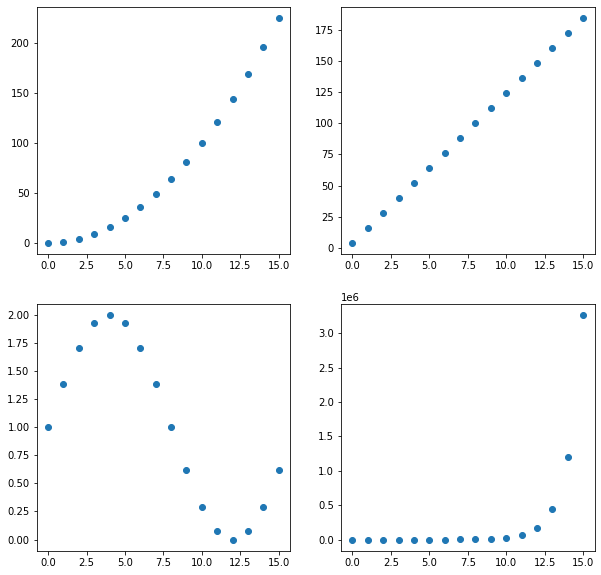

In [245]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10, 10)) # También sirve subplots(2,2,...)

ax[0][0].scatter(datos['x'],datos['y1']) # Graficamos la función 1
ax[0][1].scatter(datos['x'],datos['y2']) # Graficamos la función 2
ax[1][0].scatter(datos['x'],datos['y3']) # Graficamos la función 3
ax[1][1].scatter(datos['x'],datos['y4']) # Graficamos la función 4

plt.show() # Muestra la figura

### ❗  <span style="color:#c21d1d">**Sitios de interés para esta sección**</span> 👀:
1. [*Plots* (*figure*) de *Matplotlib*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
2. [*Sub-plots* de *Matplotlib*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

---
## 4. ✒️ Partes de un gráfico y cómo editarlas <a name="seccion-4"></a>

En un gráfico de 2 dimensiones tenemos el eje de variable indpendiente o *eje $X$*, y el eje dependiente o *eje $Y$*,
al graficar en *Python* cada uno se corresponderá con una colección/array de datos, como hemos visto en los gráficos anteriores.

Las principales partes que podemos identificar de un gráfico son las siguientes:

### ➕ Ejes
* **Título/*label* del eje**

    El título del eje corresponde a la etiqueta (*label*) que se mostrará junto a los valores del eje,
    y para editarlo se usa la función `ax.set_xlabel()` o `ax.set_ylabel()`, dependiendo del eje que queramos editar.
    Por el momento le entregaremos solo el texto que queremos como título (en el primer atributo de la función) y el tamaño de la fuente (atributo `fontsize`).
    
    Si queremos usar [_LaTeX_](https://es.wikipedia.org/wiki/LaTeX) en el *label* (útil para escribir letras griegas, supeíndices, etc), tenemos que
    escribir `r'$...$'`, por ejemplo, para el *label* $\pi x^2$, tendriamos que escribir `r'$\pi x^2$'`.
    
    Aquí hay algunos links de interés para aprender un poco de LaTeX :\
    📌[¿Cómo escribir expresiones matemáticas?](https://www.overleaf.com/learn/latex/Mathematical_expressions)\
    📌[Todos los símbolos (letras griegas, flechas, etc.)](https://manualdelatex.com/simbolos)\
    📌[¿No sabes cómo se llama el símbolo pero sí sabes dibujarlo? Aquí lo encontrarás](https://detexify.kirelabs.org/classify.html)
    
    Un buen *label* es directo y conciso, entregando solo la información necesaria. En ciencia, siempe es recomendable indicar las unidades en el título del eje.

* **Límites**

    Cuando nuestro gráfico tiene zonas vacías o sin información relevante en el contexto de nuestro trabajo,
    podemos definir límites para que los ejes solo muestren la información de la zona que queremos.
    Esto se puede hacer con las funciones `ax.set_xlim(i,f)` y `ax.set_ylim(i,f)`, lo que acotará nuestros ejes entre `i` y `f`.
    
* **Ticks**
    
    Los *ticks* son los valores que se marcan en los ejes (los palitos ☝️). También podemos editarlos utilizando `ax.tick_params()`,
    donde podemos modificar cosas como:\
    ⚙️`direction`: la dirección en la que se ubican, si es `'in'` indica que se ubican hacia dentro del gráfico, `'out'` hacia afuera,
        `'inout'` se ubican justo a la mitad.\
    ⚙️`lenght`: la longitud de los *ticks*.\
    ⚙️`width`: el ancho de los *ticks*.\
    ⚙️`labelsize`: el tamaño de fuente de los números de los *ticks*.
    
    También podemos elegir los ticks que queremos mostrar, para eso usamos `ax.set_xticks()` o `ax.set_yticks()`.

#### 📢 Título

Podemos crear/cambiar el título del gráfico utilizando `ax.set_title()`, al cual también le podemos indicar un tamaño de fuente (`fontsize`).

#### 🏷️ Leyenda

Cuando tenemos más de un elemento en nuestro gráfico puede resultar conveniente etiquetar o distinguir cada uno en leyendas.
Para mostrar la leyenda usamos `ax.legend()`, podemos modificar el tamaño de fuente (`fontsize`) y la ubicación de la leyenda en el gráfico con el atributo `loc`:

✴️`loc = 'best'` ó `0`: se ubica automáticamente en la mejor posición posible sin tapar el resto de información del gráfico.\
↗️`loc = 'upper right'` ó `1`: se ubica arriba a la derecha.\
↖️`loc = 'upper left'` ó `2`: se ubica arriba a la izquierda.\
↙️`loc = 'lower left'` ó `3`: se ubica abajo a la izquierda.\
↘️`loc = 'lower right'` ó `4`: se ubica abajo a la derecha.\
⬅️`loc = 'center left'` ó `6`: se ubica a la izquierda, en el centro.\
➡️`loc = 'center right'` ó `7`: se ubica a la derecha, en el centro.\
⬇️`loc = 'lower center'` ó `8`: se ubica abajo, en el centro.\
⬆️`loc = 'upper center'` ó `9`: se ubica arriba, en el centro.\
⏺️`loc = 'center'` ó `10`: se ubica en el centro.



Para agregar etiquetas a nuestra leyenda debemos agragar el parámetro `label = ...` en los gráficos que hayamos creado anteriormente.\
Si quieren poner la leyenda **fuera** del gráfico, revisen el atributo
[`bbox_to_anchor`](https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib).

### Ejemplo
<span style="color:#1164d1">**Garay**</span> y <span style="color:#d1ab11">**Claudia**</span>
estudian el movimiento de dos autos en la calle.

¡Increíblemente el auto 🚘 que mira <span style="color:#1164d1">**Garay**</span> se mueve exactamente como
nuestra *función 1*! es decir, su posición está dada por:

$$
x(t) = t^2
$$

¡Y para mayor coincidencia, el auto 🚖 que mira <span style="color:#d1ab11">**Claudia**</span>
se mueve igual que nuestra *función 2*! tal que su posición está dada por:

$$
x(t) = 12t + 4
$$

Graficamos `x` con `y1` para el auto de <span style="color:#1164d1">**Garay**</span>, `x` con `y2` para el de <span style="color:#d1ab11">**Claudia**</span>,
aplicando los ajustes que veamos necesarios a las partes del gráfico.

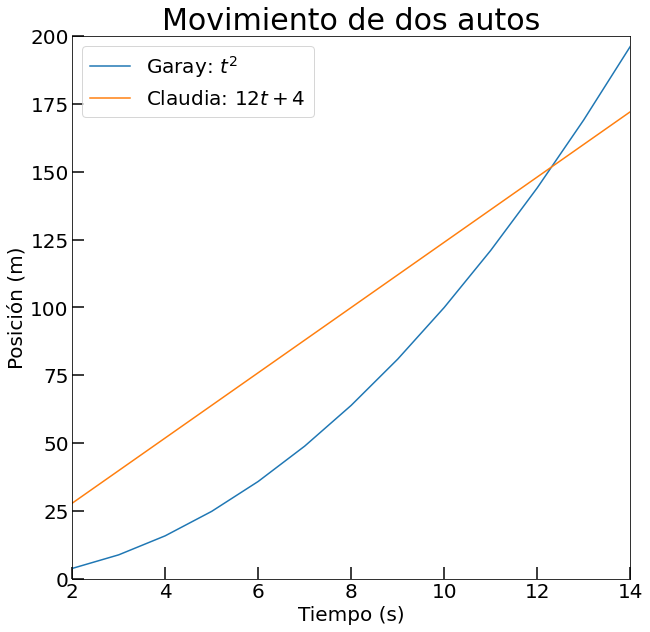

In [246]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.plot(datos['x'],datos['y1'],label=r'Garay: $t^2$')            # Primera etiqueta que se muestra en la leyenda
ax.plot(datos['x'],datos['y2'],label=r'Claudia: $12t + 4$')      # Segunda etiqueta que se muestra en la leyenda
ax.set_xlabel('Tiempo (s)',fontsize=20)                          # Nombre eje x
ax.set_ylabel('Posición (m)',fontsize=20)                        # Nombre eje y
ax.set_xlim(2,14)                                                # Rango del eje x
ax.set_ylim(0,200)                                               # Rango del eje y
ax.set_title('Movimiento de dos autos',fontsize=30)              # Título del gráfico
ax.tick_params(direction='in',length=12,width=1.5,labelsize=20)  # Parámetros de los ticks
ax.legend(fontsize=20, loc='best')                               # Leyenda
plt.show()

### ❗  <span style="color:#c21d1d">**Sitios de interés para esta sección**</span> 👀:
1. [Documentación `matplotlib.axes`](https://matplotlib.org/stable/api/axes_api.html)
2. [Documentación `set_xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)
3. [Documentación `set_xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)
4. [Documentación `tick_params()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)
5. [Documentación `set_xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)
6. [Documentación `legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)

---
## 5. 👑 Gráficos más utilizados <a name="seccion-5"></a>

### 5.1 Gráfico de línea `plot()` <a name="seccion-5.1"></a>

Los gráficos de línea se suelen utilizar para mostrar la tendencia o cambio en una variable a lo largo del tiempo (o bien el "avance" de una variable).
Es útil para representar datos con los que se espera observar una relación continua.

En *Matploltib* usamos **`plot()`** para graficar los conjuntos de datos $x$ e $y$.
A continuación creamos un gráfico para la función:

$$
y = cos(x)
$$

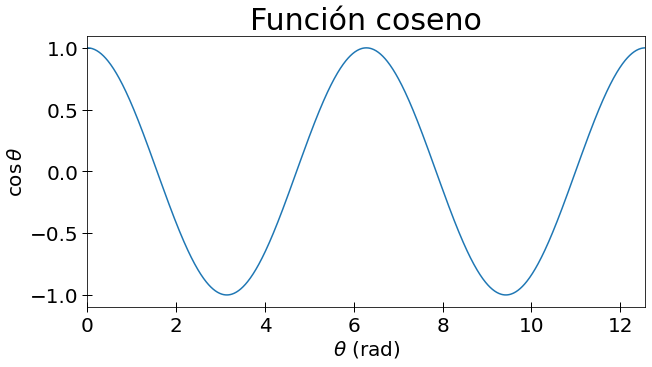

In [247]:
# Queremos graficar una función y que se vea continua -> ¡MUCHOS DATOS!

eje_x = np.linspace(0, 4*np.pi, 1000)         # linspace crea 1000 datos entre los valores 0 y 4pi
eje_y = np.cos(eje_x)                         # Usamos np.cos(x) para la función coseno

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(eje_x,eje_y)                          # Gráfico de línea
ax.set_xlabel(r'$\theta$ (rad)',fontsize=20)
ax.set_ylabel(r'$\cos{\theta}$',fontsize=20)
ax.set_title('Función coseno',fontsize=30)
ax.set_xlim(0,4*np.pi)
ax.tick_params(direction='inout',length=10,width=1,labelsize=20)
plt.show()

### 5.2 Gráfico de puntos `scatter()` y `errorbar()` <a name="seccion-5.2"></a>

Los gráficos de dispersión o de puntos se suelen emplear para visualizar la relación entre dos variables numéricas discretas.
Cada punto en el gráfico representa una observación y su posición respecto al eje $x$ e $y$.
Usualmente los encontraremos cuando estudiamos datos directamente extraidos de la observación o experimentación.

En *Matploltib* usamos **`scatter()`** para graficar los conjuntos de datos $x$ e $y$.
Para mostrar este tipo de gráficos trabajaremos con el archivo `datos_experimentales.csv`.

#### <span style="color:#d1ab11">**Ejemplo**: ¡Uno de los termómetros fue hackeado! </span>🥵 <a name="termometros"></a>

Uno de los termómetros de **Maze** fue hackeado por el DCC 😱 (Departamento de Ciencia de la Computación de la UC),
y pareciese mostrar la temperatura en una escala desconocida para nuestro amigo. Maze se dedicó toda la tarde a tomar temperaturas entre 0°C a 39°C,
y por cada medición en el termómetro bueno, miraba el termómetro dañado, el cual le mostraba una temperatura imprecisa en una escala desconocida. 

A continuación leeremos los datos recabados para esta situación hipotética.

In [248]:
datos_T = Table.read('datos_experimentales.csv') # Leemos el archivo en la ruta "datos_experimentales.csv"
datos_T

Celsius,Desconocida,Error
int64,float64,float64
0,33.41209262153977,1.5896364504223426
1,41.31437827945007,2.2530112709609766
2,41.099592126414876,0.72418384965797
3,34.31978047447999,3.588991177144164
4,41.957447045347074,0.24723683722653356
5,40.60946482927626,8.48089182354179
6,36.91777261921172,1.0097641591188897
7,51.2353999730443,0.7350337555600737
8,39.138429460873766,1.5721749555791034


Graficaremos los datos de la tabla en un gráfico de dispersión.

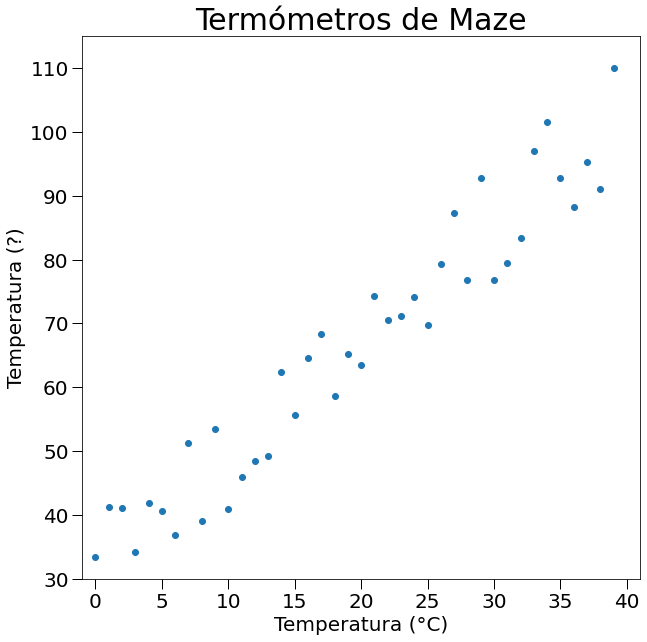

In [249]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_T['Celsius'],datos_T['Desconocida']) # Gráfico de dispersión
ax.set_xlabel('Temperatura (°C)',fontsize=20)
ax.set_ylabel('Temperatura (?)',fontsize=20)
ax.set_title('Termómetros de Maze',fontsize=30)
ax.set_xlim(-1,41)
ax.set_ylim(30,115)
ax.tick_params(direction='out',length=10,width=1,labelsize=20)
plt.show()

Usualmente, cuando obtenemos datos observacionales estos tienen un erro asociado. Para mostrar ese error usamos el gráfico `errorbar()`.
Funciona similar a `plot()` y `scatter()`, pero tiene los atributos `xerr` e `yerr` que nos permiten entregar el error de nuestros datos en $x$ e $y$.
Si queremos que muestre puntos como `scatter()` tenemos que indicarlo con el atributo `fmt` como `fmt="o"`, en otro caso lo mostrará como un gráfico
de línea.

Vemos que Maze anotó los errores de la temperatura desconocida en cada una de sus mediciones (nuestro eje $y$), entonces mostraremos esto con `yerr`:

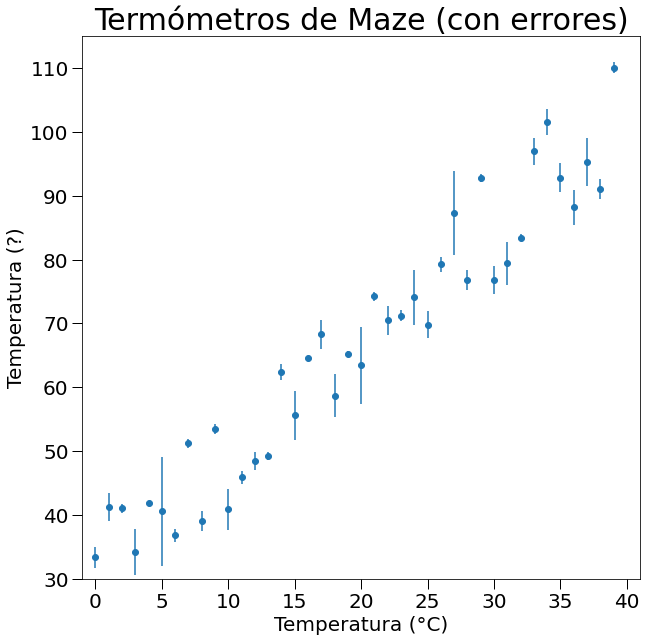

In [285]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(datos_T['Celsius'],datos_T['Desconocida'],fmt='o',yerr=datos_T['Error']) # Gráfico de dispersión
ax.set_xlabel('Temperatura (°C)',fontsize=20)
ax.set_ylabel('Temperatura (?)',fontsize=20)
ax.set_title('Termómetros de Maze (con errores)',fontsize=30)
ax.set_xlim(-1,41)
ax.set_ylim(30,115)
ax.tick_params(direction='out',length=10,width=1,labelsize=20)
plt.show()

### 5.3 Histograma `hist()` <a name="seccion-5.3"></a>

Los histogramas sirven para representar la distribución de frecuencias de una variable numérica.
Consiste en barras que muestran la frecuencia o densidad de ocurrencia de los valores dentro de intervalos predefinidos.
**¡Se los toparan bastante en la carrera!**

La forma en que se agrupan estos datos es en **bines** (_cajitas_ ☝️), son rangos de valores (equitativos) para los cuales se registra el
número de valores o frecuencia dentro de ese rango. Cuando trabajamos con histogramas, lo recomendado es que nosotros elijamos los *bins*
que vamos a ocupar para representar los datos, ya que de esto depende la interpretación que le demos a los datos. Una opción es elegir
la **cantidad de _bins_**, y otra es elegir el **ancho de _bin_**.

- **¿Cómo sabemos cuántos *bins* ocupar?** \
    Una de las formas de determinar una cantidad de *bins* apropiada es tomando la raíz cuadrada del número total de elementos $\sqrt{N}$.\
    [📌Aquí](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width) encontrarán alguna reglas
    comunes a la hora de elegir la cantidad de _bins_.\
    ¿Cómo se ve esto en código? si tienen sus datos en el array `data` de `N` datos:
    >```
    N = len(data)
    bins = int(np.sqrt(N))
    >```

    
    
- **¿Cómo sabemos qué ancho de *bin* ocupar?** \
    Si quieren elegir el ancho de *bin*, pueden prestar atención al rango de valores que manejan. Por ejemplo, si sus datos están entre 0 y 10,
    sería apropiado elegir un ancho de 1 o 0.5, pero **no** sería apropiado elegir un ancho de 5.\
    ¿Cómo se ve esto en código? si tienen sus datos en el array `data` y un ancho `w`, una forma de obtner los _bins_ es:
    >```
    w = 0.5
    bins = np.arange(np.min(data), np.max(data) + w, w)
    >```

En *Matploltib* usamos **`hist()`** para crear el histograma que tomará el conjunto de datos que le entreguemos.\
Además debemos señalar el número de _bins_ con el atributo `bins = ...`:

- Si usamos el **número de _bins_** entonces `bins` debe ser un entero (_int_).
- Si usamos el **ancho de _bin_** entonces `bins` debe ser un conjunto de número indicando los bordes de cada _bin_ (_array_),
    como se ve en el ejemplo de arriba.
    
Para mostrar este tipo de gráficos imaginemos una distribución normal de alturas en dos poblaciones.

#### <span style="color:#d1ab11">**Ejemplo**: Mico el micrófono pregunta la altura a la gente</span> 🗣🎙

[Mico el micrófono](https://youtube.com/playlist?list=PLwOanHdrCs2GmWXvelLT9lINibekKowGa&si=e1dL2Q6b1XsM_OXx) sale a la calle a
preguntarle a la gente su altura, sin querer confunde los datos y obtiene dos poblaciones distintas,
lo que Mico no se esperaba es que cada población presentara un comportamiento característico 👁👄👁.

En este caso hipotético generaremos dos sets de datos con la función `normal()` del módulo `random` de *Numpy*.
Esta función genera $N$ cantidad de datos aleatorios siguiendo una [*distribución normal* o *gaussiana*](https://es.wikipedia.org/wiki/Distribución_normal),
centrada en un valor promedio y con una desviación estándar dada

In [255]:
# Crear 200 datos aleatorios pertenecientes a una gaussiana centrada en 165 con desviación estándar 5
altura_1 = np.random.normal(165,5,200)

# Crear 200 datos aleatorios pertenecientes a una gaussiana centrada en 172 con desviación estándar 5
altura_2 = np.random.normal(172,5,200)

Para este ejemplo usaremos el **número de _bins_**.
En nuestro caso `N = 200` para ambas poblaciones, por lo que el número de bines será $\sqrt{N} = \sqrt{200} \approx 14$.

In [251]:
bins = int(np.sqrt(200))
bins

14

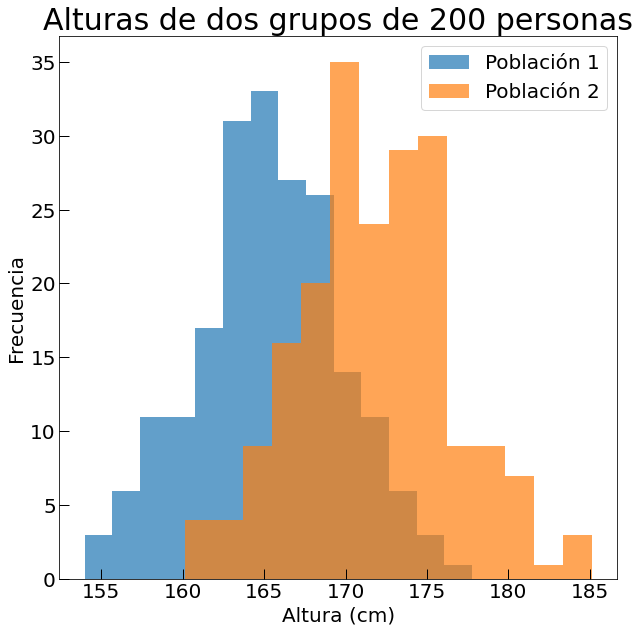

In [256]:
fig,ax = plt.subplots(figsize=(10, 10))
ax.hist(altura_1,bins,label='Población 1',alpha=0.7) # Histograma con 14 bins, alpha indica la transparencia
ax.hist(altura_2,bins,label='Población 2',alpha=0.7) # Histograma con 14 bins
ax.set_xlabel('Altura (cm)',fontsize=20)
ax.set_ylabel('Frecuencia',fontsize=20)
ax.set_title('Alturas de dos grupos de 200 personas',fontsize=30)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.legend(fontsize=20, loc='best')
plt.show()

También, se le puede agregar el parámetro `density=True` para normalizar el histograma,
pero es necesario tener en mente que al hacerlo la frecuencia pasa a ser la frecuencia relativa o "densidad".\
Esto es útil si nos interesa más la *forma* de la distribución por sobre las *cuentas*.

In [257]:
# Crear 500 datos aleatorios pertenecientes a una gaussiana centrada en 160 con desviación estándar 5
altura_3 = np.random.normal(160,5,500)

# Crear 5000 datos aleatorios pertenecientes a una gaussiana centrada en 180 con desviación estándar 5
altura_4 = np.random.normal(180,5,5000)

# Para variar un poco, usaremos el ancho de bin
w = 2
bins = np.arange(145, 205 + w, w)

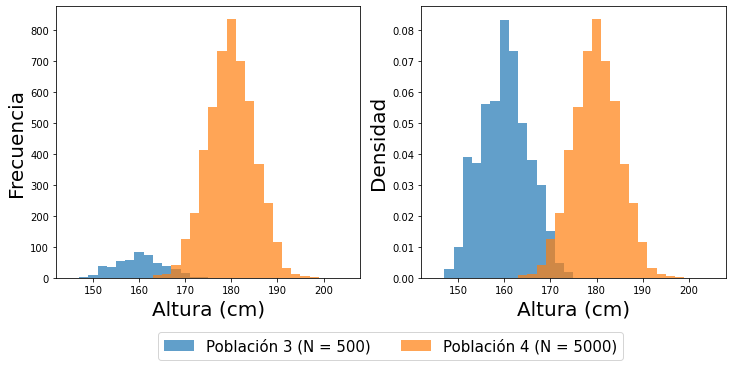

In [258]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Con density = False (predeterminado) 
ax[0].hist(altura_3,bins,alpha=0.7)
ax[0].hist(altura_4,bins,alpha=0.7)
ax[0].set_xlabel('Altura (cm)',fontsize=20)
ax[0].set_ylabel('Frecuencia',fontsize=20)

# Con density = True
ax[1].hist(altura_3,bins,label=f'Población 3 (N = {len(altura_3)})',density=True,alpha=0.7)
ax[1].hist(altura_4,bins,label=f'Población 4 (N = {len(altura_4)})',density=True,alpha=0.7)
ax[1].set_xlabel('Altura (cm)',fontsize=20)
ax[1].set_ylabel('Densidad',fontsize=20)

# Pondremos una sola leyenda fuera de los gráficos
ax[1].legend(fontsize=15, ncols=2, loc='center', bbox_to_anchor=(-0.1,-0.25))

plt.show() # Muestra la figura

### 5.4 Gráfico de contorno `contourf()` y `contour()` <a name="seccion-5.4"></a>

Los gráficos de contorno se suelen utilizar para visualizar la densidad o la distribución de puntos en un plano.
Los contornos muestran áreas de concentración alta o baja de datos, permitiendo identificar patrones espaciales.
Los podemos encontrar en mapas topográficos, mapeos meteorológicos de la presión o temperatura del aire, o incluso el estudio de la
densidad estelar de una galaxia, visualizando la distribución de las estrellas en la galaxia.

Muchas veces se les puede asociar una función $z(x,y)$ que depende de las variables $x$ e $y$.
En *Matploltib* usamos `contourf()` para graficar los conjuntos de datos de datos $x$,$y$ y $z$.
Para mostrar este tipo de gráficos crearemos una "malla" 2D con los ejes $X$ e $Y$ y sobre esta asignaremos
valores $Z$ de acuerdo a una función.

#### <span style="color:#d1ab11">**Ejemplo**: ¡BREAKING NEWS! Meteorito cae en Linux</span> 😢💥

>📻: *"La tarde del pasado jueves un meteorito impactó la famosa sala Linux de la facultad de Física,
    dejando un cráter de impacto con una forma particular"* 

En esta situación hipotética modelaremos la función [$z(x,y) = x^2 + y^2$](https://es.wikipedia.org/wiki/Paraboloide)
que describe la profundidad del cráter, para ello definimos la función `altura()` que retorna la profundidad $z$ del crater dada
la distancia en $x$ e $y$. Con la función [`meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
creamos una matriz o cuadrícula en 2 dimensiones utilizando $x$ e $y$ ("malla 2D").

In [260]:
# Definir la función altura z(x, y)
def altura(x, y):
    return x**2 + y**2

# Crear un array de valores para x y y
distancia_x = np.linspace(-5, 5, 100)
distancia_y = np.linspace(-5, 5, 100)

# Crear una cuadrícula 2D a partir de los arrays x e y
X, Y = np.meshgrid(distancia_x, distancia_y)

# Calcular los valores de z para cada punto en la cuadrícula
Z = altura(X, Y) - 56  # -56 simplemente para que el suelo esté a 0 metros

Graficamos. También, podemos agregar una barra de color con `plt.colorbar()`, que indica qué significa cada color en el gráfico.

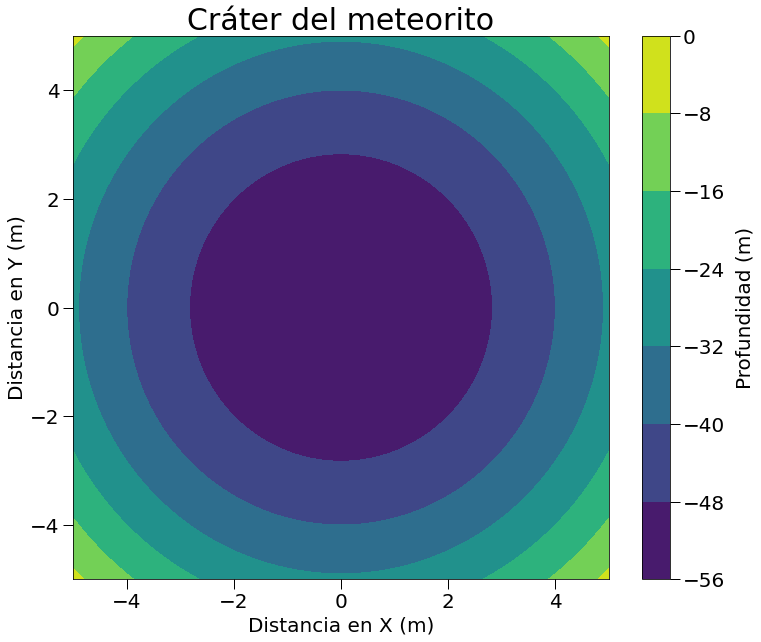

In [261]:
fig, ax  = plt.subplots(figsize=(12,10))
contorno = ax.contourf(X,Y,Z)  # Gráfico de contorno relleno
ax.set_xlabel('Distancia en X (m)',fontsize=20)
ax.set_ylabel('Distancia en Y (m)',fontsize=20)
ax.set_title('Cráter del meteorito',fontsize=30)
ax.tick_params(direction='out',length=10,width=1,labelsize=20)

# Agregamos la barra que indica que significa cada color
cbar = plt.colorbar(contorno,ax=ax) 
cbar.set_label(label='Profundidad (m)',labelpad=10,fontsize=20)
cbar.ax.tick_params(length=10,width=1,labelsize=20)

plt.show()

También exsite `contour()`, hace exáctamente lo mismo pero mostrando solo los contornos, sin el relleno de color
(por eso no lleva la `f` de _filled_).

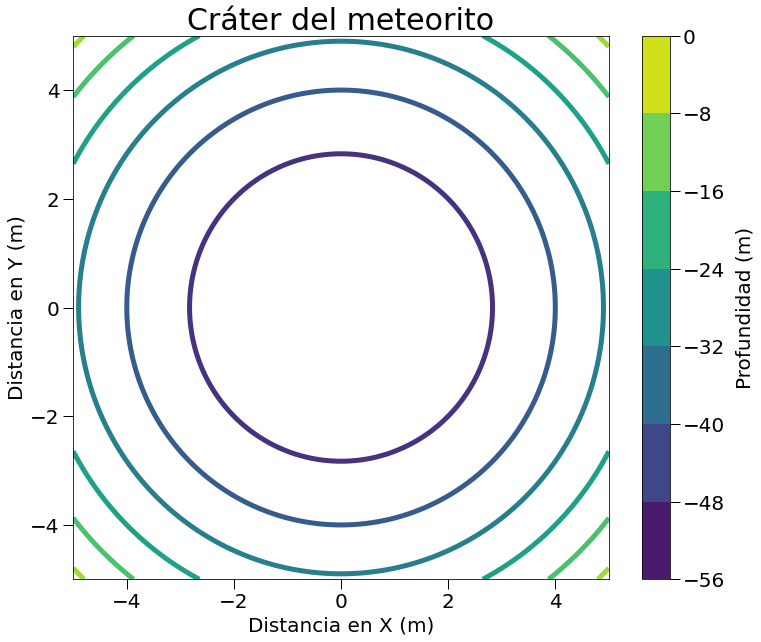

In [262]:
fig, ax  = plt.subplots(figsize=(12,10))
ax.contour(X,Y,Z,linewidths=5)  # Gráfico de contorno relleno
ax.set_xlabel('Distancia en X (m)',fontsize=20)
ax.set_ylabel('Distancia en Y (m)',fontsize=20)
ax.set_title('Cráter del meteorito',fontsize=30)
ax.tick_params(direction='out',length=10,width=1,labelsize=20)

# Agregamos la barra que indica que significa cada color
cbar = plt.colorbar(contorno,ax=ax) 
cbar.set_label(label='Profundidad (m)',labelpad=10,fontsize=20)
cbar.ax.tick_params(length=10,width=1,labelsize=20)

plt.show()

### 5.5 Gráfico de barra `bar()` <a name="seccion-5.5"></a>

Los gráficos de barra son útiles para comparar la frecuencia de diferentes categorías o grupos.
Cada barra representa una categoría y su altura indica el valor asociado a esa categoría,
lo que facilita la comparación visual entre ellas.

En *Matploltib* usamos **`bar()`** para graficar las frecuencia $y$ asociadas a las categorías $x$.

#### <span style="color:#d1ab11">**Ejemplo**: Torneo de videojuegos ASTROFIZ</span> 🕹

El CEFF (Centro de Estudiantes Facultad de Física UC) quiere organizar un torneo de videojuegos pero no sabe qué
es lo que juegan los jovenes de hoy en día 🗿. Para ello realizan una encuesta ordenando los datos en un gráfico de barras.

En esta situación hipotética tenemos un *array* con diferentes juegos, los cuales corresponden a las categorías que iran en el eje
$X$ del gráfico, luego tenemos un *array* con frecuencias correspondientes a la cantidad de personas que juegan cada videojuego en el eje $Y$.

In [263]:
frecuencias = np.array([15,1,20,6,12,10])
juego_fav = np.array(['League of\nLegends','Fall Guys','Minecraft','Valorant','Fortnite','Free Fire'])

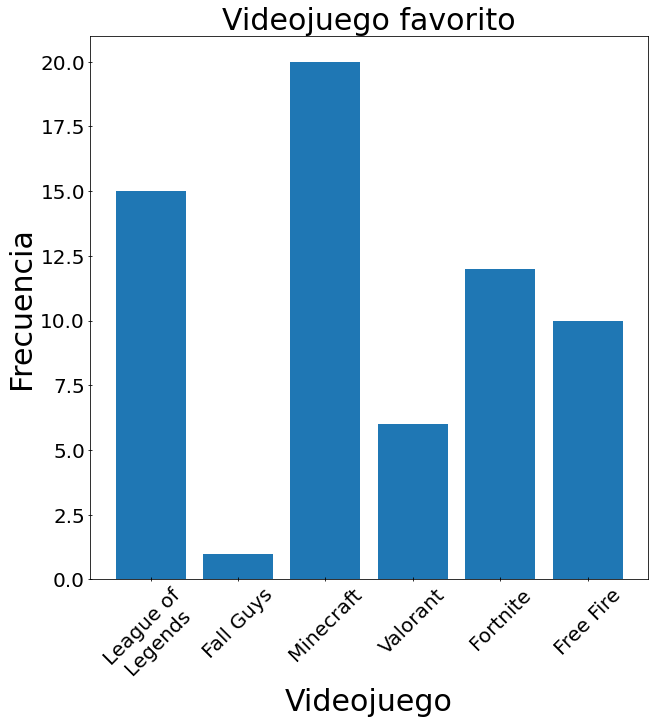

In [264]:
fig,ax=plt.subplots(figsize=(10,10))
ax.bar(juego_fav,frecuencias) # Gráfico de barras
ax.set_xlabel('Videojuego',fontsize=30)
ax.set_ylabel('Frecuencia',fontsize=30)
ax.tick_params(direction='inout',axis='both',labelsize=20)
ax.tick_params(axis='x',rotation=45)
ax.set_title('Videojuego favorito',fontsize=30)
plt.show()

### ❗  <span style="color:#c21d1d">**Sitios de interés para esta sección**</span> 👀:
1. [Tipos de gráficos disponibles en *Matplotlib*](https://matplotlib.org/stable/plot_types/index.html)
2. [Más sobre ancho _bin_](https://indico.cern.ch/event/428334/contributions/1047042/attachments/919069/1299634/ChoosingTheRightBinWidth.pdf)

---
## 6. 🛠️ Herramientas para estudiar gráficos <a name="seccion-6"></a>

Ya habiendo aprendido a crear gráficos a partir de datos, veamos algunas herramientas que podrían resultar útiles.

### 6.1 Ajuste de curvas <a name="seccion-6.1"></a>

Muchas veces, cuando tenemos un conjunto de datos observacionales o experimentales, queremos ver si existe alguna relación entre las variables.
Si revisamos el [ejemplo de los termómetros de Maze](#termometros), vemos que el gráfico pareciera presentar una relación lineal entre la
escala de temperatura desconocida y la escala en °C. Lo que hacemos en estos casos es buscar el mejor ajuste de los datos utilizando un modelo o función que consideremos apropiada. 

Existen varias formas de hacer esto con *Python*, nosotros utilizaremos la función `curve_fit()` del módulo `optimize` de *Scipy*.
Esta función permite calcular la curva que mejor se ajuste a los datos dado un modelo $f(x)$,
con el conjunto de puntos $x$ e $y$. `curve_fit()` retorna varias cosas, generalmente a nosotros nos interesan solos los primeros dos *returns*:

* (Primer *return*) `popt`: Son los parámetros o constanes de $f(x)$ que mejor ajustan la función a los datos.
* (Segundo *return*) `pcov`: Es la covariancia estimada aproximada del ajuste (una matriz). Con esto es posible calcular el "error" del ajuste como: `error = np.sqrt(np.diag(pcov))`

Veamos como se aplica esto en el ejemplo de los termómetros.

In [268]:
# Importamos la función curve_fit
from scipy.optimize import curve_fit

Nosotros esperamos que los datos tengan una relación lineal, asique nuestro modelo $f(x)$ será del tipo:

$$
f(x) = a \cdot x + b
$$

Donde $a$ y $b$ son los parámetros que queremos ajustar (`popt`). En el ejemplo, nuestro "$x$" es la temperatura en °C `datos_T['Celcius']`,
y nuestro "$y$" es la temperatura en la escala desconocida `datos_T['Desconocida']`:

$$
\text{Desconocida} = a \cdot \text{Celcius} + b
$$

👉 **1° paso**: definir el modelo

In [265]:
# Definimos el modelo que queremos probar, en este caso un ajuste lineal con dos parámetros
def modelo(x,a,b): 
    y =  a*x + b
    return y # Alternativa: Escribir directamente return a*x + b

👉 **2° paso**: obtener los datos

In [269]:
datos_T = Table.read('datos_experimentales.csv') # Leemos los dato

datos_x = datos_T['Celsius']     # Array de datos en x
datos_y = datos_T['Desconocida'] # Array de datos en y

👉 **3° paso**: calcular el ajuste

Al primer *return* `popt` lo llamaremos `parametros`, y al segundo *return* `pcov` lo llamaremos `matriz_cov`.

In [270]:
parametros,matriz_cov = curve_fit(modelo, datos_x, datos_y)

# Alternativa:
# parametros = curve_fit(...)[0]
# covarianza = curve_fit(...)[1]

a,b = parametros

# Alternativa:
# a = parametros[0]
# b = parametros[1]

print(f'Parámetro a: {a}')
print(f'Parámetro b: {b}')

Parámetro a: 1.7365699549118137
Parámetro b: 32.33587289714336


**¿Cómo sabemos que tan bueno es nuestro ajuste?**

Diremos que 1 desvación estándar (1$\sigma$) es el error de cierto parámetro $k$, es decir, $\sigma_k$. Sabemos que la varianza es simplemente
$\sigma_k^2$, por tanto el error de los parámetros que obtuvimos en nuestro ajuste se calcula como la raiz de las diagonales de la matriz de covarianza (`pcov`).

¿Por qué? La matriz de covarianza se ve algo así:

$$
\texttt{matriz}\text{_}\texttt{pcov} = \begin{pmatrix}
\sigma_a^2 & \sigma_{a,b} \\
\sigma_{b,a} & \sigma_b^2
\end{pmatrix}
$$

donde $\sigma_a^2$ es la varianza de $a$, $\sigma_b^2$ la varianza de $b$, y $\sigma_{a,b}$ o $\sigma_{b,a}$ la covarianza entre ambos parámetros.
Para obtener las diagonales usamos `diag()` de *Numpy*, lo que nos devuelve un array con las diagonales:

$$
\texttt{np.diag(matriz}\text{_}\texttt{pcov)} = [\sigma_a^2, \sigma_b^2]
$$

Solo nos queda calcular la raiz de cada varianza, lo que nos dará el error (1$\sigma$) de cada parámetro:

$$
\texttt{np.sqrt(np.diag(matriz}\text{_}\texttt{pcov))} = [\sigma_a, \sigma_b]
$$

In [271]:
error_a,error_b = np.sqrt(np.diag(matriz_cov))

# Alternativa:
# a = parametros[0]
# b = parametros[1]

print(f'Error del parámetro a: {error_a}')
print(f'Error del parámetro b: {error_b}')

Error del parámetro a: 0.07981008703144934
Error del parámetro b: 1.808539547513688


Así, si quisieramos mostrar el resultado de nuestro ajuste en algún trabajo, tendríamos que $a = 1.74 \pm 0.08$ y $b = 32.34 \pm 1.81$.

👉 **4° paso**: graficar

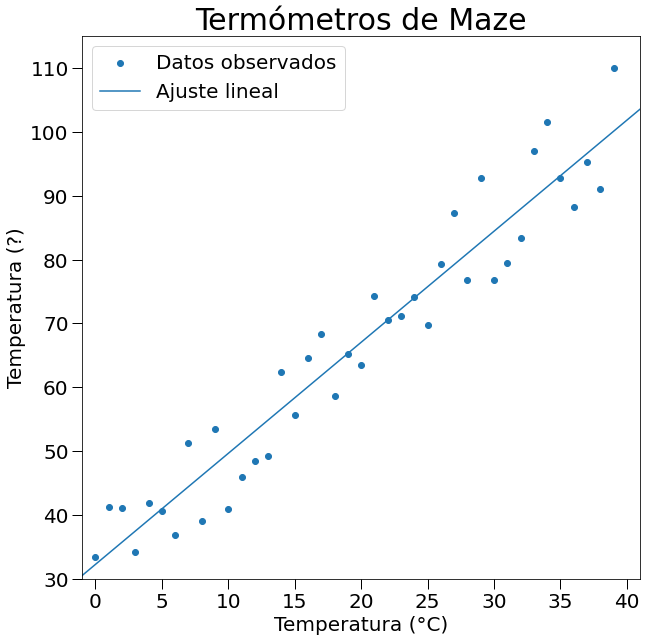

In [272]:
ajuste_x = np.linspace(-1,41,500) # Generamos 500 datos en x para evaluar el modelo
ajuste_y = modelo(ajuste_x,a,b)   # Evaluamos nuestra función modelo con los parámetros a y b

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_x,datos_y,label='Datos observados') # Datos observacionales
ax.plot(ajuste_x,ajuste_y,label='Ajuste lineal')     # Ajuste con la función modelo
ax.set_xlabel('Temperatura (°C)',fontsize=20)
ax.set_ylabel('Temperatura (?)',fontsize=20)
ax.set_title('Termómetros de Maze',fontsize=30)
ax.set_xlim(-1,41)
ax.set_ylim(30,115)
ax.tick_params(direction='out',length=10,width=1,labelsize=20)
ax.legend(fontsize=20)
plt.show()

👉 **5° paso**: interpretar

Del ajuste vemos que nuestro primer parámetro es $a = 1.74 \pm 0.08$ y el segundo $b = 32.34 \pm 1.81$,
así que aproximadamente tenemos esta relación:

$$
\text{Desconocida} \approx 1.74 \cdot \text{Celcius} + 32.34
$$

Nosotros conocemos la relación entre la escala Fahrenheit y Celsius está dada por:

$$
\text{Fahrenheit} = 1.8 \cdot \text{Celsius} + 32
$$

Nuestro $a$ es bastante cercano a $1.8$, de hecho gracias al error que calculamos sabemos que se puede mover entre $\sim1.66$ y $\sim1.82$. Lo mismo para $b$,
sus valores se mueven entre $\sim30.5$ y $\sim34.2$.

**¿Qué podemos concluir de esto?** Que el termómetro hackeado de Maze simnplemente es un termómetro que mide en escala
Fahrenheit 👍.

### 6.2 Estimación de la densidad de Kernel (KDE) <a name="seccion-6.2"></a>

**🤔 ¿Qué es exactamente un KDE?**

>Para no complicarnos, definamoslo como una versión "continua" del histograma. Mientras un histograma usa barras discretas,
el KDE crea una curva suave y continua que estima la densidad de probabilidad de los datos (similar a lo que vimos en el histograma con `dentisty=True`).
A la función matemática que se usa para realizar esto se le llama *kernel*.


**👍 ¿Qué <span style="color:#0a9600">ventajas</span> tiene el gráfico KDE versus un histograma?**
> Es súper útil cuando tenemos muchas distribuciones juntas, ya que ayuda a que el gráfico se vea más "limpio" y menos desordenado.
En algunas ocasiones, será más facil interpretar un KDE que un histograma, ya que la curva continua puede hacer patrones más evidentes a simple vista.
**¡No depende de bins!**


**👎 ¿Qué <span style="color:#a80202">desventajas</span> tiene el gráfico KDE versus un histograma?**
> Cuando usamos un gráfico KDE estamos asuminedo una función (*kernel*, usualmente gaussiano). Si la distribución real tiene bordes abruptos o no es suave,
el KDE puede dar una impresión engañosa. También, si el KDE suaviza demasiado los datos podríamos perder información importante o malinterpretar los datos.

<span style="color:#d1ab11">**También es viable combinar histogramas con gráficas KDE, y así aprovechar lo mejor de cada uno.**</span>

#### **Ejemplo**

Para ver cómo funcionan las gráficas KDE, usaremos los datos de `pangui_query.csv`.

> 📣 Un astrónomo observó 3 manchas inusuales en el cielo. Al usar su telescopio vio un grupo de 3 cúmulos globulares de estrellas ¡JUNTOS!.
Ante tal descubrimiento, recurrió rápidamente a la [base de datos del observatorio espacial Gaia](https://gea.esac.esa.int/archive/) y obtuvo la posición de las estrellas (RA y DEC),
luego procedió a clasificarlas. Decidió llamar a su nuevo descubriento _**"Pangui"**_, así, cada estrella podía ser del cúmulo _Pangui 1_, _Pangui 2_ ó _Pangui 3_.
Las estrellas que no fueron clasificadas en ningún cúmulo las llamó estrellas de _campo_.

Esto fue lo que vió el astrónomo:

<img src="https://i.ibb.co/YFCwQPJ1/pangui-clusters.png" alt="pangui_clusters" width="30%">

Nuestra misión será observar las distribuciones de estas estrellas en el espacio y ver si también identificamos los cúmulos Pangui.

**Nota: los cúmulos Pangui no existen 😔👌**

In [273]:
# Importamos la función gaussian_kde
from scipy.stats import gaussian_kde

In [274]:
# Leemos los datos de pangui_query.csv
estrellas = Table.read('pangui_query.csv')
estrellas

Cúmulo,RA,DEC
str8,float64,float64
Pangui 1,31.30684267891039,65.54472227214829
Pangui 1,31.171027592756495,67.94761563531475
Pangui 1,30.37159560466113,68.90155534730066
Pangui 1,34.295241717240714,68.41533916311704
Pangui 1,31.735390842274935,64.44791810543911
Pangui 1,38.76817709294872,62.66451598121748
Pangui 1,29.446759603105317,69.60317633476775
Pangui 1,31.72827347747822,77.85001709640042
Pangui 1,31.40391393374985,65.00914074283078


#### 🗺️ Veamos cómo se distribuyen los datos en la ascención recta (RA) usando un gráfico KDE 

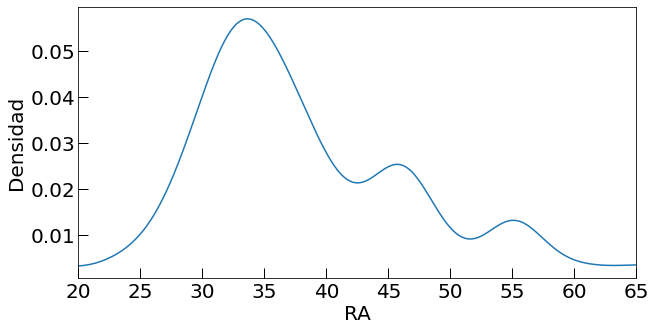

In [275]:
fig,ax = plt.subplots(figsize=(10, 5))

# Generamos el KDE usando las coordenadas RA de las estrellas
kde = gaussian_kde(stars['RA'])

# Generamos los valores en el eje X para evaluar el KDE
x_kde = np.linspace(20,65,1000)

# Graficamos
ax.plot(x_kde, kde(x_kde))
    
ax.set_xlabel('RA',fontsize=20)
ax.set_ylabel('Densidad',fontsize=20)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.set_xlim(20,65)
plt.show()

Mostrémoslo junto a un histograma para comparar.

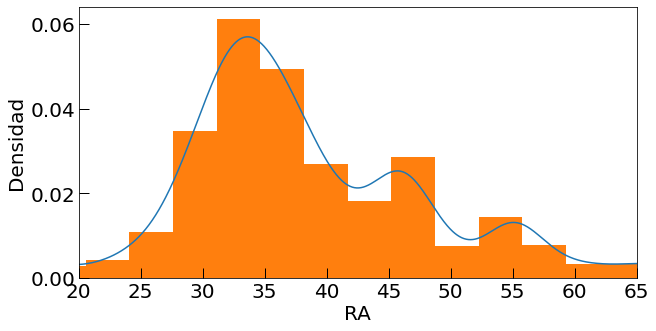

In [276]:
fig,ax = plt.subplots(figsize=(10, 5))

kde = gaussian_kde(stars['RA'])
x_kde = np.linspace(20,65,1000)

ax.plot(x_kde, kde(x_kde))           # KDE
ax.hist(stars['RA'],17,density=True) # Histograma
    
ax.set_xlabel('RA',fontsize=20)
ax.set_ylabel('Densidad',fontsize=20)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.set_xlim(20,65)
plt.show()

#### 🗺️ Veamos cómo se distribuyen los datos en la declinación (DEC) usando un gráfico KDE 

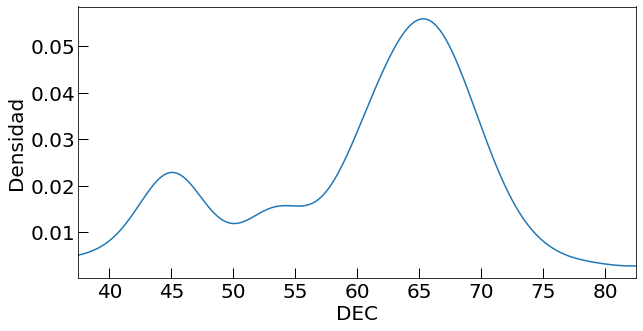

In [186]:
fig,ax = plt.subplots(figsize=(10, 5))

# Generamos el KDE usando las coordenadas DEC de las estrellas
kde = gaussian_kde(stars['DEC'])

# Generamos los valores en el eje X para evaluar el KDE
x_kde = np.linspace(37.5,82.5,1000)

# Graficamos
ax.plot(x_kde, kde(x_kde))
    
ax.set_xlabel('DEC',fontsize=20)
ax.set_ylabel('Densidad',fontsize=20)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.set_xlim(37.5,82.5)
plt.show()

Mostrémoslo junto a un histograma para comparar.

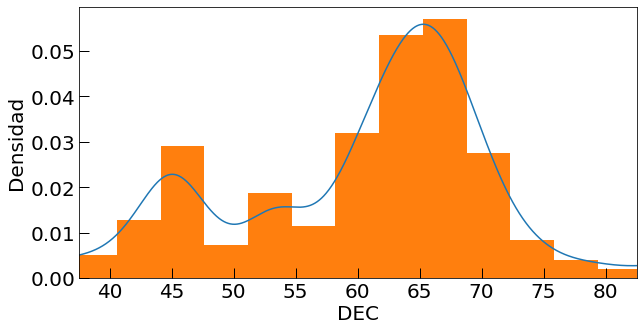

In [194]:
fig,ax = plt.subplots(figsize=(10, 5))

kde = gaussian_kde(stars['DEC'])
x_kde = np.linspace(37.5,82.5,1000)

ax.plot(x_kde, kde(x_kde))            # KDE
ax.hist(stars['DEC'],17,density=True) # Histograma
    
ax.set_xlabel('DEC',fontsize=20)
ax.set_ylabel('Densidad',fontsize=20)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.set_xlim(37.5,82.5)
plt.show()

#### ✨ Veamos cómo se distribuye cada cúmulo

In [277]:
# Para separar los cúmulos usaremos máscaras (revisar documentación)
pangui_1 = stars[ stars['Cúmulo']=='Pangui 1' ]
pangui_2 = stars[ stars['Cúmulo']=='Pangui 2' ]
pangui_3 = stars[ stars['Cúmulo']=='Pangui 3' ]
campo    = stars[ stars['Cúmulo']=='Campo'    ]

**Usando histogramas**

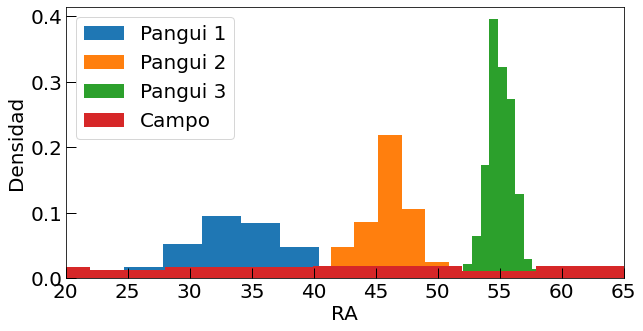

In [278]:
fig,ax = plt.subplots(figsize=(10, 5))

ax.hist(pangui_1['RA'],density=True,label='Pangui 1')
ax.hist(pangui_2['RA'],density=True,label='Pangui 2')
ax.hist(pangui_3['RA'],density=True,label='Pangui 3')
ax.hist(campo['RA']   ,density=True,label='Campo')
    
ax.set_xlabel('RA',fontsize=20)
ax.set_ylabel('Densidad',fontsize=20)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.set_xlim(20,65)
ax.legend(fontsize=20)
plt.show()

**Usando KDE**

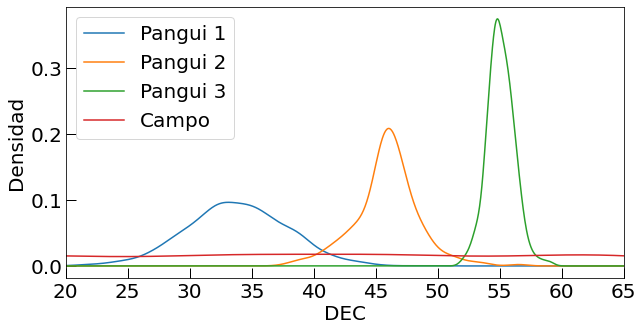

In [279]:
fig,ax = plt.subplots(figsize=(10, 5))


kde_1 = gaussian_kde(pangui_1['RA']) # KDE de Pangui 1
kde_2 = gaussian_kde(pangui_2['RA']) # KDE de Pangui 2
kde_3 = gaussian_kde(pangui_3['RA']) # KDE de Pangui 3
kde_c = gaussian_kde(campo['RA'])    # KDE de Campo
x_kde = np.linspace(20,65,1000)

# Graficamos
ax.plot(x_kde, kde_1(x_kde),label='Pangui 1')
ax.plot(x_kde, kde_2(x_kde),label='Pangui 2')
ax.plot(x_kde, kde_3(x_kde),label='Pangui 3')
ax.plot(x_kde, kde_c(x_kde),label='Campo')

    
ax.set_xlabel('DEC',fontsize=20)
ax.set_ylabel('Densidad',fontsize=20)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.set_xlim(20,65)
ax.legend(fontsize=20)
plt.show()

#### 👀 **EXTRA:** Librería [_Seaborn_](https://seaborn.pydata.org).

La librería _Seaborn_ es basa en _Matplotlib_, y nos ofrece una alternativa más rápida, fácil y elegante para hacer gráficas KDE.
Para este taller veremos rápidamente cómo funciona, recomiendo fuertemente revisar su documentación y echarle un ojo 👍.

**Insatalación**

Para instalar la librería lo hacemos igual que con el resto:

> `pip install seaborn`

O si usan Anaconda/Miniconda

> `conda install seaborn`

**Gráfica KDE**

Para crear un KDE es tán fácil como usar `sns.kdeplot()`.

<Axes: ylabel='Density'>

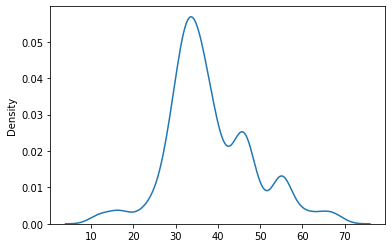

In [211]:
sns.kdeplot(stars['RA'])

Si queremos incluirla en nuestra figura, solo debemos indicar el `ax` en donde queremos que se grafique.

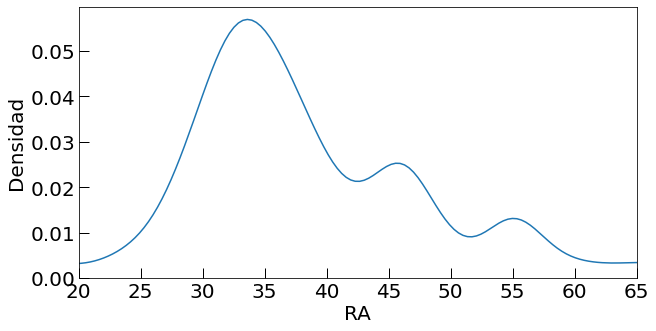

In [214]:
fig,ax = plt.subplots(figsize=(10, 5))

# Gráfica del KDE
sns.kdeplot(stars['RA'],ax=ax)
    
ax.set_xlabel('RA',fontsize=20)
ax.set_ylabel('Densidad',fontsize=20)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.set_xlim(20,65)
plt.show()

También nos permite hacer KDE en 2D fácilmente. Sólo debemos indicar cuál es el `x` y cuál es el `y`, es similar a una gráfica de contorno.

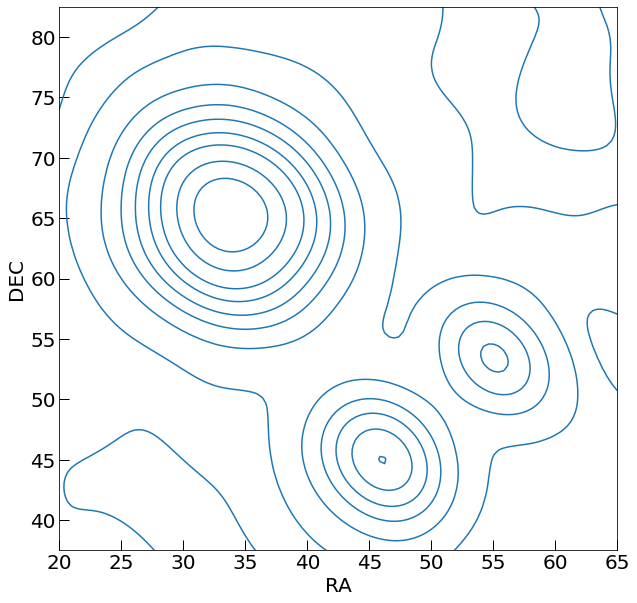

In [221]:
fig,ax = plt.subplots(figsize=(10, 10))

# Gráfica del KDE
sns.kdeplot(x=stars['RA'],y=stars['DEC'],ax=ax)

ax.set_xlabel('RA',fontsize=20)
ax.set_ylabel('DEC',fontsize=20)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.set_xlim(20,65)
ax.set_ylim(37.5,82.5)
plt.show()

Veamos esto junto a cada estrella 🧐

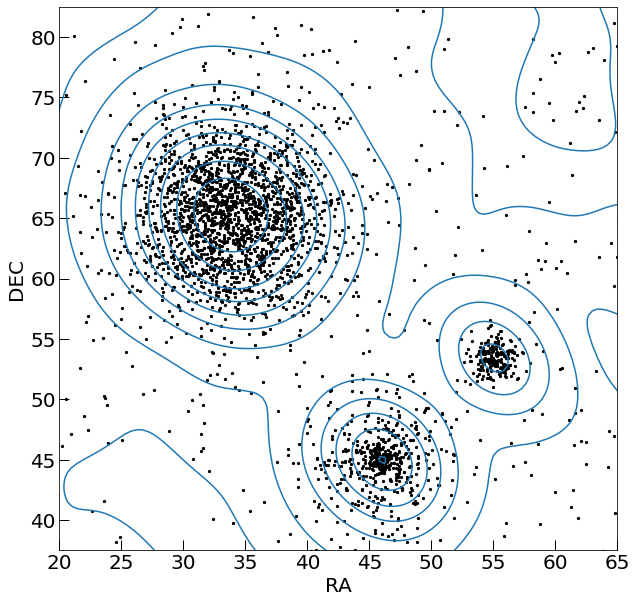

In [222]:
fig,ax = plt.subplots(figsize=(10, 10))

sns.kdeplot(x=stars['RA'],y=stars['DEC'],ax=ax)
ax.scatter(stars['RA'],stars['DEC'],c='k',s=5)
    
ax.set_xlabel('RA',fontsize=20)
ax.set_ylabel('DEC',fontsize=20)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.set_xlim(20,65)
ax.set_ylim(37.5,82.5)
plt.show()

### ❗  <span style="color:#c21d1d">**Sitios de interés para esta sección**</span> 👀:
1. [Documentación de `curve_fit()` de *Scipy*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
2. [Documentación de `gaussian_kde()` de *Scipy*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html)
3. [Documentación de `kdeplot()` de *Seaborn*](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

---
## 7. 🎀 Estética de un gráfico <a name="seccion-7"></a>

En esta sección veremos algunas cosas que, si bien no son obligatorias para graficar,
pueden hacer que nuestros gráficos sean más coherentes, claros, y bonitos 💯.

### 7.1 Parámetros <a name="seccion-7.1"></a>

#### 🎨 Colores
    
* **Color**\
Podemos cambiar el color de prácticamente todo usando el atributo `color` (ó `c`). Por ejemplo, se puede elegir
el color de las líneas de nuestros gráficos de línea, el color de los puntos en los gráficos de dispersión,
el color de relleno de los histogramas, entre otros.

* **Transparencia**\
En la mayoría de objetos, si no en todos, podemos usar el atributo `alpha`, que controla la transparencia del objeto.
Por ejemplo, `alpha = 0.5` hace al objeto 50% transparente.

* **Mapa de Color**\
Cuando usamos mapas de colores, se suele usar el atributo `cmap`, que indica qué mapa de colores (_color maps_) estámos ocupando.
_Matplotlib_ ofrece sus propios _color maps_, los más comunes son `"viridis"`, `"inferno"`, `"magma"`, `"plasma"`, `"cvidis"` y `"Greys"`.

    
#### 🖋️ Estilos

* **Líneas**\
    Con el atributo `linewidth` (ó `lw`) podemos elegir el ancho de la línea, por ejemplo:\
    
    ⚙️`linewidth = 1`

    Con el atributo `linestyle` (ó `ls`) podemos cambiar el estilo de las líneas, las opciones más simples son:\
    
    ⚙️`linestyle = "-"` para una lína **continua**\
    ⚙️`linestyle = "--"` para una línea **segmentada**\
    ⚙️`linestyle = ":"` para una línea **punteada**\
    ⚙️`linestyle = "-."` para una línea que **alterna segmentos y puntos**
    
* **Marcadores**\
    Con el atributo `size` (ó `s`) podemos elegir el tamaño del marcador, por ejemplo:\
    
    ⚙️`size = 25`
    
    Con el atributo `marker` (ó `m`) podemos elegir el tipo de marcador, por ejemplo:\
    
    ⚙️`marker = "o"` para que los marcadores sean un **círculo**\
    ⚙️`marker = "^"` para que los marcadores sean un **triángulo**\
    ⚙️`marker = "s"` para que los marcadores sean un **cuadrado**\
    ⚙️`marker = "*"` para que los marcadores sean una **estrella**

* **Histogramas**\
    Con el atributo `histtype` podemos elegir cómo se ve el histograma, tenemos estas opciones:\
    
    ⚙️`histtype = "bar"` histograma típico, muestra el histograma como varias **barras rellenas** juntas.\
    ⚙️`histtype = "barstacked"` es un histograma de tipo **barras múltiples**, los datos se apilan unos sobre otros.\
    ⚙️`histtype = "step"` igual que un histograma típico, pero solo se muestra el "**contorno**", es decir, las barras sin relleno de color.\
    ⚙️`histtype = "stepfilled"` mezcla "_bar_" y "_step_", mostrando un histograma con **contorno y relleno**.
    
    Con el atributo `orientation` podemos elegir en qué eje se orienta el histograma, tenemos:\
    
    ⚙️`orientation = "vertical"` es la default, el histograma se encuentra en el eje X (**verticalmente**)\
    ⚙️`orientation = "horizontal"` el histograma se encuentra en el eje Y (**horizontalmente**)

Todos los objetos tienen muchos más atributos que permiten personalizarlos aún más.
    
#### 📰 Fuentes de texto

Podemos cambiar el estilo de las fuentes que usamos. Existen múltiples formas de hacerlo,
en este taller veremos dos que sirven según la parte del gráfico que queramos editar.
Usualmente, las opciones que le queremos cambiar a nuestras fuentes de texto son:\

⚙️`family` el nombre o familia de la fuente, como _serif_, _sans-serif_, _monospace_, etc.\
⚙️`color` el color de la fuente.\
⚙️`size` el tamaño de la fuente.\
⚙️`weight` el "peso" o "grosor" de la fuente, como _light_ , _normal_, _bold_, etc.

Para cambiar la fuente de algún objeto de nuestro gráfico, se puede usar el atributo `fontdict`.
Este recibe un [diccionario de _Python_](https://www.w3schools.com/python/python_dictionaries.asp) con las opciones que describimos
arriba. O bien, podemos indicar cada atributo por separado. 

En el caso de la leyenda usamos el atributo `prop`. No es tan intuitivo como `fontdict`, ya que `prop` recibe un objeto
del tipo `font_manager.FontProperties()`, que lo obtenemos importando `matplotlib.font_manager`. Luego veremos un ejemplo.

#### 📐 Cuadrícula
Podemos añadir una cruadícula o malla a nuestro gráfico usando `ax.grid()`. Esto nos genera una cuadrícula automática,
pero también es personalizable (ver documentación).

#### ➖ Líneas verticales y horizontales
Podemos agregar líneas rectas verticales con `ax.axvline(x)` indicando el valor de $x$ en el que queremos la línea,
o líneas rectas horizontales con `ax.axhline(y)` indicando el valor de $y$ en el que queremos la línea.
    

#### 📝 Textos
También podemos agregar textos flotantes en el gráfico utilizando `ax.text(x,y,texto)`,
a este le debemos indicar la posición $x$,$y$, y el texto que queremos desplegar. Por supuesto, podemos personalizar
el texto que vamos a mostrar.

### 7.2 🖼️ Ejemplo 1 <a name="seccion-7.2"></a>

En este ejemplo haremos los siguientes cambios al gráfico de los Termómetros de Maze de la [sección 6.1](#seccion-6.1):

<img src="https://i.ibb.co/1YYxX99W/6-1-ajuste-termometros.png" alt="6.1_ajuste_termometros" width="30%">

- Cambiaremos las fuentes a _serif_
- Cambiaremos el color de los marcadores a negro con tipo triángulo y agregaremos barras de error rojas
- Cambiaremos el color de la línea a verde y el estilo a segmentado
- Cambiaremos el estilo de la línea

Para la fuente de los labels usamos un diccionario:

In [7]:
font1 = {'family': 'serif',
         'color' : 'black',
         'size'  :      20,
         'weight':'normal',
        }

Para la fuente de la leyenda usaremos el `FontProperties`:

In [13]:
import matplotlib.font_manager as fm

font2 = fm.FontProperties(family='serif',size=20,weight='normal')

Graficamos:

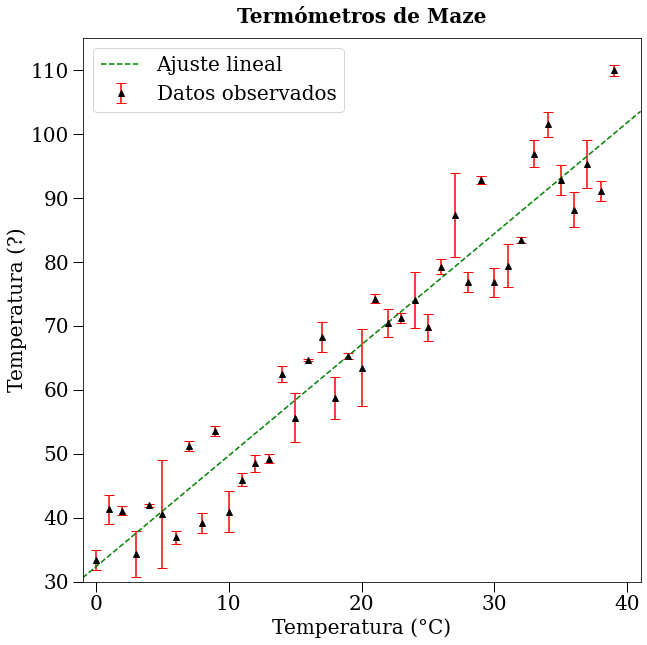

In [327]:
fig, ax = plt.subplots(figsize=(10, 10))

# Gráficas
ax.errorbar(datos_x, datos_y, fmt='^', yerr=datos_T['Error'],
            color='black', ecolor='red', capsize=5, label='Datos observados') 
ax.plot(ajuste_x, ajuste_y, color='green', ls='--', label='Ajuste lineal')

# Labels
ax.set_xlabel('Temperatura (°C)', fontdict=font1)
ax.set_ylabel('Temperatura (?)', fontdict=font1)
ax.set_title('Termómetros de Maze', fontdict=font1, weight='bold', pad=15)

# Ticks
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),fontdict=font1)
ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),fontdict=font1)
ax.tick_params(direction='out', length=10, width=1, labelsize=20)

# Límites
ax.set_xlim(-1,41)
ax.set_ylim(30,115)

# Leyenda
ax.legend(prop=font2)

plt.show()

### 7.3 🖼️ Ejemplo 2 <a name="seccion-7.3"></a>

En este ejemplo haremos los siguientes cambios al gráfico de la función sinusoidal de la [sección 3.2](#seccion-3.2):

<img src="https://i.ibb.co/x8hSm5Th/sin.png" alt="3.2_sin" width="30%">

- Agregaremos labels
- Cambiaremos las fuentes a _monospace_
- Cambiaremos el estilo de los puntos a diamantes
- Agregaremos una línea continua azul
- Agregaremos una cuadrícula
- Agregaremos una línea vertical y horizontal indicando el máximo de la función
- Agregaremos un texto indicando el valor del máximo
- Agregaremos los ticks menores o pequeños (minor ticks)

In [6]:
font3 = {'family': 'monospace',
         'color' :     'black',
         'size'  :          20,
         'weight':    'normal',
        }

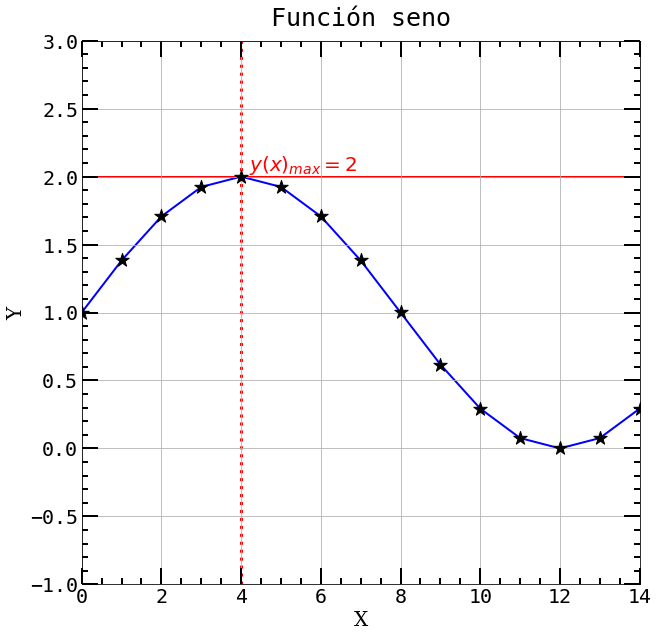

In [329]:
fig, ax = plt.subplots(figsize=(10, 10))

# Gráficas
ax.plot(datos['x'],datos['y3'],c='b',lw=2,zorder=1)
ax.scatter(datos['x'],datos['y3'],c='k',marker='*',s=200,zorder=2)

# Labels
ax.set_xlabel('X',fontdict=font1)
ax.set_ylabel('Y',fontdict=font1)
ax.set_title('Función seno',size=25,fontdict=font3,pad=15)

# Límites
ax.set_xlim(1,14)
ax.set_ylim(-1,3)

# Ticks
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),fontdict=font3)
ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),fontdict=font3)
ax.minorticks_on()
ax.tick_params(direction='in',length=16,width=2,labelsize=20,which='major',right=True,top=True)
ax.tick_params(direction='in',length=6,width=2,labelsize=20,which='minor',right=True,top=True)

# Líneas rectas y texto
ax.axvline(4,c='r',ls=':',lw=3,zorder=1)
ax.axhline(2,c='r',ls='-',lw=2,zorder=1)
ax.text(4.2,2,r'$y(x)_{max}=2$',color='r',ha='left',va='bottom',fontdict=font3)

# Grid
ax.grid()

plt.show()

### 7.4 🖼️ Ejemplo 3 <a name="seccion-7.4"></a>

En este ejemplo haremos los siguientes cambios al gráfico de las alturas de la [sección 5.3](#seccion-5.3):

<img src="https://i.ibb.co/fV0bCy26/5-3a-hist1y2.png" alt="5.3_alturas" width="30%">

- Cambiaremos las fuentes a _sans-serif_
- Cambiaremos el estilo de uno de los histogramas a _step_
- Cambiaremos la orientación de los histogramas

In [14]:
font4 = {'family': 'sans-serif',
         'color' :      'black',
         'size'  :           20,
         'weight':     'normal',
        }
font5 = fm.FontProperties(family='sans-serif',size=20,weight='normal')

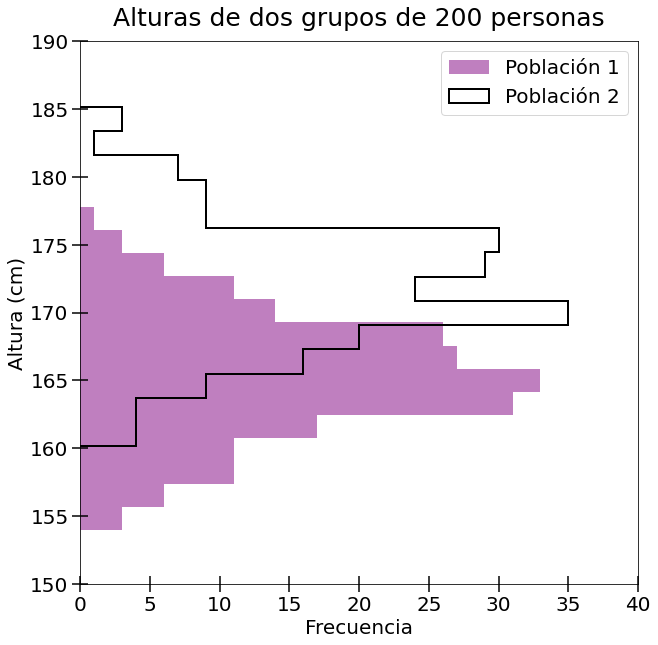

In [337]:
fig,ax = plt.subplots(figsize=(10, 10))

# Gráficas
ax.hist(altura_1,bins=14,color='purple',alpha=0.5,orientation='horizontal',label='Población 1')
ax.hist(altura_2,bins=14,color='k',lw=2,histtype='step',orientation='horizontal',label='Población 2')

# Labels
ax.set_xlabel('Frecuencia',fontdict=font4)
ax.set_ylabel('Altura (cm)',fontdict=font4)
ax.set_title('Alturas de dos grupos de 200 personas',size=25,fontdict=font4,pad=15)

# Ticks
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),fontdict=font4)
ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),fontdict=font4)
ax.tick_params(direction='inout',length=16,width=1.5,labelsize=20)

# Leyenda
ax.legend(loc='best',prop=font5)

plt.show()

### 7.5 🖼️ Ejemplo 4 <a name="seccion-7.5"></a>

En este ejemplo haremos los siguientes cambios al gráfico del cráter de la [sección 5.4](#seccion-5.4):

<img src="https://i.ibb.co/JWQbr49P/5-4a-contourf.png" alt="5.4_crater" width="30%">

- Cambiaremos el _color map_ del gráfico de contornos
- Cambiaremos la ubicación de la barra de color

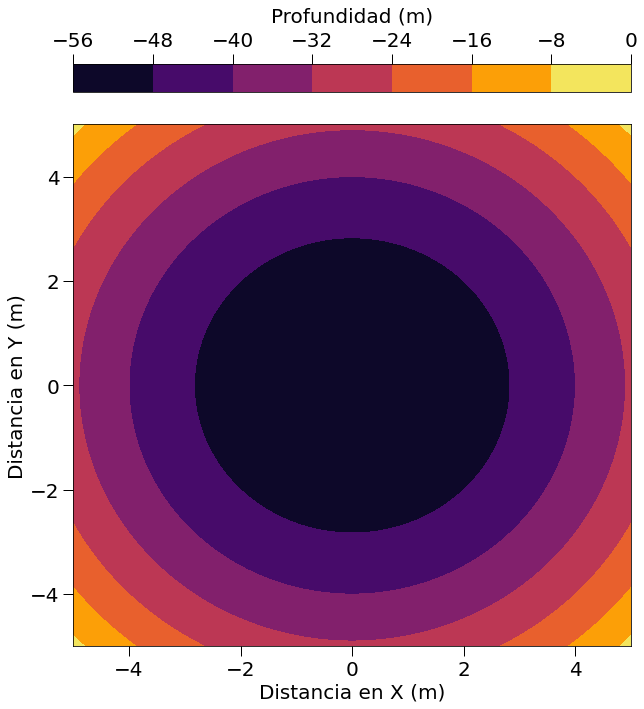

In [351]:
fig, ax  = plt.subplots(figsize=(10,12))

# Gráfica
contorno = ax.contourf(X,Y,Z,cmap='inferno')

# Labels
ax.set_xlabel('Distancia en X (m)',fontsize=20)
ax.set_ylabel('Distancia en Y (m)',fontsize=20)

# Ticks
ax.tick_params(direction='out',length=10,width=1,labelsize=20)

# Barra de color
cbar = plt.colorbar(contorno,ax=ax,location='top',pad=0.05) 
cbar.set_label(label='Profundidad (m)',labelpad=10,fontsize=20)
cbar.ax.tick_params(length=10,width=1,labelsize=20)

plt.show()

### 7.6 🌐 Cambiar parámetros globales <a name="seccion-7.6"></a>

Por lo general, hay cosas de la estética que queremos igual para todos los gráficos. Por ejemplo, que todos los gráficos
tengan un tamaño de fuente de 20, o que todos los gráficos tengan líneas con un grosor de 1.5.

Una forma de cambiar estos "**parámetros globales**" es usando  `rcParams` de _Matplotlib_. A continuación un ejemplo:

In [353]:
# Importamos rcParams
from matplotlib import rcParams

In [366]:
plt.rcParams.update({"axes.titlesize"   :  30,   # Tamaño título siempre 30
                     "axes.labelsize"   :  25,   # Tamaño label de ejes siempre 25.
                     "lines.linewidth"  : 1.5,   # Grosor de líneas siempre 1.5
                     "lines.markersize" :  15,   # Tamaño marker siempre 15
                     "xtick.labelsize"  :  20,   # Tamaño ticks eje x siempre 20
                     "ytick.labelsize"  :  20})  # Tamaño ticks eje y siempre 20

Ahora hagamos una gráfica sin modificar nada estético de la lista de arriba, para ver el efecto de usar `rcParams`:

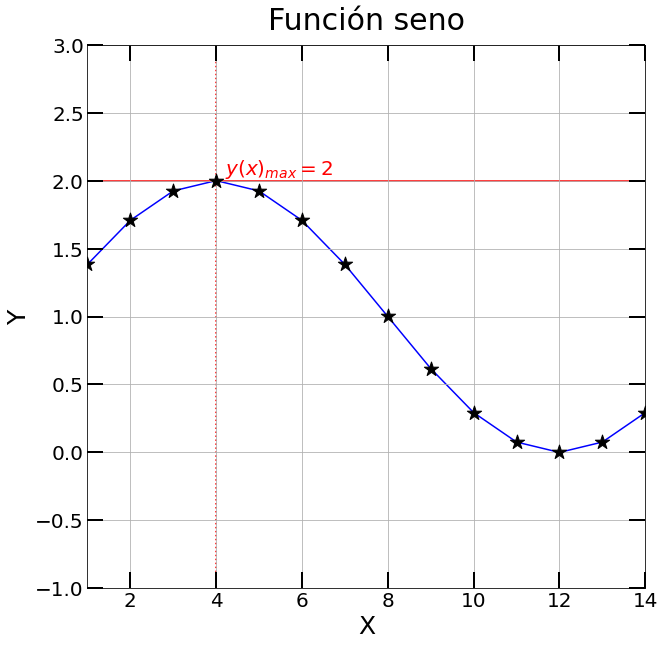

In [367]:
fig, ax = plt.subplots(figsize=(10, 10))

# Gráficas
ax.plot(datos['x'],datos['y3'],c='b',zorder=1)
ax.scatter(datos['x'],datos['y3'],c='k',marker='*',zorder=2)

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Función seno',pad=15)

# Límites
ax.set_xlim(1,14)
ax.set_ylim(-1,3)

# Ticks
ax.tick_params(direction='in',length=16,width=2,which='major',right=True,top=True)
ax.tick_params(direction='in',length=6,width=2,which='minor',right=True,top=True)

# Líneas rectas y texto
ax.axvline(4,c='r',ls=':',zorder=1)
ax.axhline(2,c='r',ls='-',zorder=1)
ax.text(4.2,2,r'$y(x)_{max}=2$',color='r',ha='left',va='bottom',fontsize=20)

# Grid
ax.grid()

plt.show()

Para **resetear**/reestablecer los parámetros a su valor original podemos usar `rcdefaults()`.

**OJO:** en un jupyter notebook, es recomendable reiniciar el kernel luego de aplicar `rcdefaults()`, ya que podrían haber bugs.

In [368]:
# Reestablece los rcParams
plt.rcdefaults()

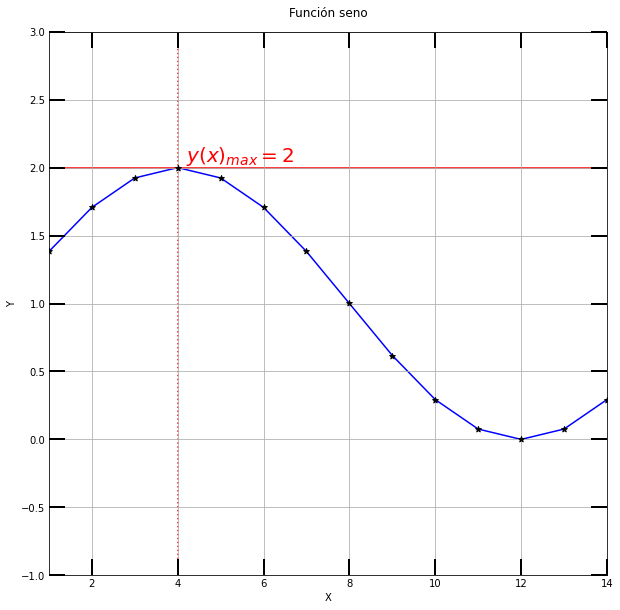

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

# Gráficas
ax.plot(datos['x'],datos['y3'],c='b',zorder=1)
ax.scatter(datos['x'],datos['y3'],c='k',marker='*',zorder=2)

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Función seno',pad=15)

# Límites
ax.set_xlim(1,14)
ax.set_ylim(-1,3)

# Ticks
ax.tick_params(direction='in',length=16,width=2,which='major',right=True,top=True)
ax.tick_params(direction='in',length=6,width=2,which='minor',right=True,top=True)

# Líneas rectas y texto
ax.axvline(4,c='r',ls=':',zorder=1)
ax.axhline(2,c='r',ls='-',zorder=1)
ax.text(4.2,2,r'$y(x)_{max}=2$',color='r',ha='left',va='bottom',fontsize=20)

# Grid
ax.grid()

plt.show()

#### 📢 Una cosa que podrían haber notado, es que los textos en LaTeX no se ven afectados por los estilos de texto
Para esto debemos modificar los textos tipo `mathtext`. Les comparto dos soluciones con las dos familias de fuentes más usadas:

##### ✔️ sans-serif
Ejemplo con la sans-serif "Helvetica"

In [16]:
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Helvetica',
    'mathtext.it': 'Helvetica:italic',
    'mathtext.bf':'Helvetica:bold'
})

##### ✔️ serif
Ejemplo con la serif "Times New Roman"

In [ ]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'Times New Roman',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf':'Times New Roman:bold'
})

### 7.7 💾 Guardar gráficas como imágenes <a name="seccion-7.7"></a>

Para guardar nuestras hermosas gráficas como imágenes, usamos la función `save_fig()`. El único atributo obligatorio que deben entregarle
a la función es el _path_/ubicación donde quieren guardar su imagen. En el _path_ ustedes indicarán qué tipo de imágen quieren, lo más común
es `.png`, `.svg` y `.pdf` (recomendado si usan overleaf).

Algunos parámetros que recomiendo conocer y utilizar:

* `bbox_inches="tight"`: Elimina los espacios vacíos alrededor de la figura al guardarla, si algo se sale de la figura,
    esto hace que se "aprieten" para no quedar fuera.
* `pad_inches=0.3`: Añade un pequeño borde extra a la imagen que se guarda, de forma que aseguremos no perder información de
    la gráfica que esté muy cerca de los bordes.
* `dpi=200`: Define la resolución de la imagen (puntos por pulgada). A mayor valor, más calidad (y tamaño de archivo).
    Si quieren gráficos de buena calidad, se recomienda valores entre 200 a 300. (sólo aplica en formato `.png`)

\
\
👀 **Otra recomendación:**

Si usarán sus gráficas para algún trabajo (ya sea en pregrado o posteriormente en sus publicaciones)
se recomienda usar el formato `.pdf` para las imágenes, ya que este formato es vectorial y optimiza el tiempo de carga de la imágen en sí.

Si usan `.pdf`, entonces cada vez que hagan una gráfica de cualquier tipo (`plot`, `scatter`, `hist`, etc) agreguen el atributo `rasterized=True`,
esto también ayuda a que sus imágenes no pesen tanto y carguen más rápido en los procesadores de texto (como [Overleaf](https://es.overleaf.com)).

\
Guardemos una imagen:

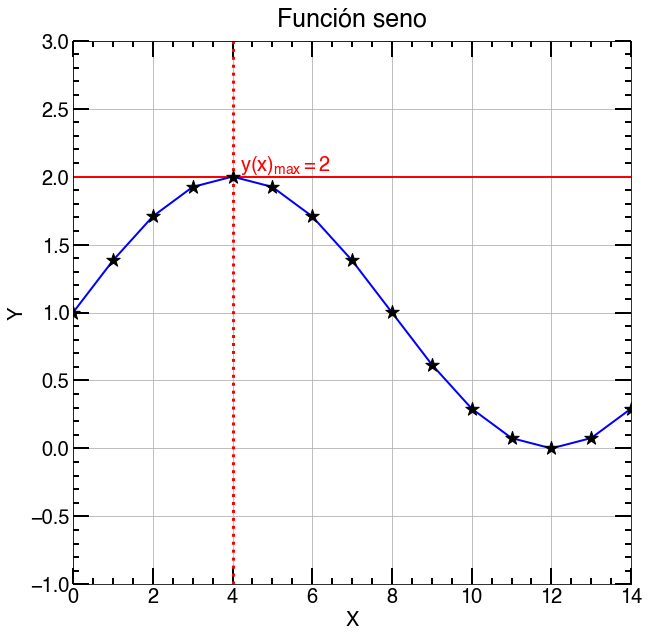

In [20]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='w') # El fondo de la figura es blanco en vez de transparente

ax.plot(datos['x'],datos['y3'],c='b',lw=2,zorder=3,rasterized=True)
ax.scatter(datos['x'],datos['y3'],c='k',marker='*',s=200,zorder=4,rasterized=True)

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_title('Función seno',size=25,fontsize=25,pad=15)

ax.set_xlim(1,14)
ax.set_ylim(-1,3)

ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),fontsize=20)
ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),fontsize=20)
ax.minorticks_on()
ax.tick_params(direction='in',length=16,width=2,labelsize=20,which='major',right=True,top=True)
ax.tick_params(direction='in',length=6,width=2,labelsize=20,which='minor',right=True,top=True)

ax.axvline(4,c='r',ls=':',lw=3,zorder=2,rasterized=True)
ax.axhline(2,c='r',ls='-',lw=2,zorder=2,rasterized=True)
ax.text(4.2,2,r'$y(x)_{max}=2$',color='r',ha='left',va='bottom',fontsize=20)

ax.grid(zorder=1)


# Guardar imagen en .png
plt.savefig('mi_grafica.png',bbox_inches='tight',pad_inches=0.3,dpi=300)

# Guardar imagen en .pdf
plt.savefig('mi_grafica.pdf',bbox_inches='tight',pad_inches=0.3)

plt.show()

### ❗  <span style="color:#c21d1d">**Sitios de interés para esta sección**</span> 👀:
1. [Colores de _Matplotlib_](https://matplotlib.org/stable/gallery/color/named_colors.html)
2. [Mapas de colores de _Matplotlib_](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
3. [Textos en _Matplotlib_](https://matplotlib.org/stable/users/explain/text/text_intro.html#sphx-glr-users-explain-text-text-intro-py)
4. [Documentación de `rcParams`](https://matplotlib.org/stable/users/explain/customizing.html)
5. [Documentación de `save_fig()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

## **¡Gracias por utilizar este notebook 👻!**